# Stance Detection for the Fake News Challenge

## Identifying Textual Relationships with Deep Neural Nets

### Check the problem context [here](https://drive.google.com/open?id=1KfWaZyQdGBw8AUTacJ2yY86Yxgw2Xwq0).

### Download files required for the project from [here](https://drive.google.com/open?id=10yf39ifEwVihw4xeJJR60oeFBY30Y5J8).

## Step1: Load the given dataset  

1. Mount the google drive

2. Import Glove embeddings

3. Import the test and train datasets

### Mount the google drive to access required project files

Run the below commands

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive/')

#### Path for Project files on google drive

**Note:** You need to change this path according where you have kept the files in google drive. 

In [0]:
project_path = "/content/drive/My Drive/Fake News Challenge/"

### Loading the Glove Embeddings

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'glove.6B.zip', 'r') as z:
  z.extractall()

# Load the dataset [5 Marks]

1. Using [read_csv()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) in pandas load the given train datasets files **`train_bodies.csv`** and **`train_stances.csv`**

2. Using [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) command in pandas merge the two datasets based on the Body ID. 

Note: Save the final merged dataset in a dataframe with name **`dataset`**.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [0]:
#self defined function from .py files
import clean as cl
import tfidf as ti
import feature as fe
import language_model as lm
import model as md


<h2> Check1:</h2>
  
<h3> You should see the below output if you run `dataset.head()` command as given below </h3>

In [0]:
train_bodies = pd.read_csv('./fnc-1/train_bodies.csv')
train_stances = pd.read_csv('./fnc-1/train_stances.csv')
test_bodies = pd.read_csv('./fnc-1/competition_test_bodies.csv')
test_stances = pd.read_csv('./fnc-1/competition_test_stances.csv')

In [0]:
train_bodies.head()

,Body ID,articleBody
0,0,A small meteorite crashed into a wooded area i...
1,4,Last week we hinted at what was to come as Ebo...
2,5,(NEWSER) – Wonder how long a Quarter Pounder w...
3,6,"Posting photos of a gun-toting child online, I..."
4,7,At least 25 suspected Boko Haram insurgents we...


In [0]:
train_bodies.shape

(1683, 2)

In [0]:
train_stances.head()

,Headline,Body ID,Stance
0,Police find mass graves with at least '15 bodi...,712,unrelated
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated
4,Spider burrowed through tourist's stomach and ...,1923,disagree


In [0]:
train_stances.shape

(49972, 3)

In [0]:
test_bodies.shape

(904, 2)

In [0]:
test_stances.shape

(25413, 3)

clean data

In [0]:
clean_stances = train_stances.copy()
clean_bodies = train_bodies.copy()

In [0]:
clean_headline = [cl.clean_sentence(sentence) for sentence in clean_stances['Headline']]   
clean_article = [cl.clean_sentence(sentence) for sentence in clean_bodies['articleBody']]  

In [0]:
clean_stances['Headline'] = clean_headline
clean_bodies['articleBody'] = clean_article

In [0]:
#test set
clean_test_stances = test_stances.copy()
clean_test_bodies = test_bodies.copy()

In [0]:
clean_test_headline = [cl.clean_sentence(sentence) for sentence in clean_test_stances['Headline']]   
clean_test_article = [cl.clean_sentence(sentence) for sentence in clean_test_bodies['articleBody']]  

In [0]:
clean_test_stances['Headline'] = clean_test_headline
clean_test_bodies['articleBody'] = clean_test_article

In [0]:
clean_stances.head()

,Headline,Body ID,Stance
0,"[police, find, mass, graf, least, body, near, ...",712,unrelated
1,"[hundreds, palestinians, flee, flood, gaza, is...",158,agree
2,"[christian, bale, pass, role, steve, jobs, act...",137,unrelated
3,"[hbo, apple, talks, month, apple, tv, streamin...",1034,unrelated
4,"[spider, burrow, tourist, stomach, chest]",1923,disagree


In [0]:
clean_stances.shape

(49972, 3)

In [0]:
clean_bodies.head()

,Body ID,articleBody
0,0,"[small, meteorite, crash, wooded, area, nicara..."
1,4,"[last, week, hint, come, ebola, fear, spread, ..."
2,5,"[newser, wonder, long, quarter, pounder, chees..."
3,6,"[posting, photo, gun, tot, child, online, isis..."
4,7,"[least, suspected, boko, haram, insurgent, kil..."


In [0]:
clean_bodies.shape

(1683, 2)

In [0]:
clean_test_stances.head()

,Headline,Body ID,Stance
0,"[ferguson, riot, pregnant, woman, lose, eye, c...",2008,unrelated
1,"[crazy, conservatives, sure, gitmo, detainee, ...",1550,unrelated
2,"[russian, guy, says, justin, bieber, ringtone,...",2,unrelated
3,"[zombie, cat, buried, kitty, believed, dead, m...",1793,unrelated
4,"[argentina, president, adopts, boy, end, werew...",37,unrelated


In [0]:
clean_test_bodies.head()

,Body ID,articleBody
0,1,"[al, sisi, deny, israeli, report, state, offer..."
1,2,"[bereave, afghan, mother, take, revenge, talib..."
2,3,"[cnbc, report, tesla, choose, nevada, site, gi..."
3,12,"[inch, version, iphone, say, development, repl..."
4,19,"[gr, editor, note, report, western, mainstream..."


observe unique headlines and bodies

In [0]:
uni_head = train_stances['Headline'].unique()

In [0]:
uni_body = train_bodies['articleBody'].unique()

In [0]:
clean_uni_head = [cl.clean_sentence(sentence) for sentence in uni_head]   
clean_uni_body = [cl.clean_sentence(sentence) for sentence in uni_body]  

In [0]:
len(clean_uni_body)

1669

In [0]:
len(clean_uni_head)

1648

In [0]:
clean_uni_all = clean_uni_head + clean_uni_body

In [0]:
len(clean_uni_all)

3317

merge body and stance

In [0]:
clean_merge = pd.merge(clean_stances, clean_bodies, how='left', on=['Body ID', 'Body ID'])

In [0]:
clean_merge.head()

,Headline,Body ID,Stance,articleBody
0,"[police, find, mass, graf, least, body, near, ...",712,unrelated,"[danny, boyle, direct, untitled, film, seth, r..."
1,"[hundreds, palestinians, flee, flood, gaza, is...",158,agree,"[hundreds, palestinians, evacuate, home, sunda..."
2,"[christian, bale, pass, role, steve, jobs, act...",137,unrelated,"[year, old, moscow, resident, hospitalize, wou..."
3,"[hbo, apple, talks, month, apple, tv, streamin...",1034,unrelated,"[reuters, canadian, soldier, shoot, canadian, ..."
4,"[spider, burrow, tourist, stomach, chest]",1923,disagree,"[fear, arachnophobes, story, bunbury, spiderma..."


In [0]:
sum(clean_merge.Headline == clean_stances.Headline)

49972

In [0]:
clean_merge.shape

(49972, 4)

In [0]:
clean_test_merge = pd.merge(clean_test_stances, clean_test_bodies, how='left', on=['Body ID', 'Body ID'])

In [0]:
clean_test_merge.head()

,Headline,Body ID,Stance,articleBody
0,"[ferguson, riot, pregnant, woman, lose, eye, c...",2008,unrelated,"[respected, senior, french, police, officer, i..."
1,"[crazy, conservatives, sure, gitmo, detainee, ...",1550,unrelated,"[dave, morin, social, network, company, path, ..."
2,"[russian, guy, says, justin, bieber, ringtone,...",2,unrelated,"[bereave, afghan, mother, take, revenge, talib..."
3,"[zombie, cat, buried, kitty, believed, dead, m...",1793,unrelated,"[hewlett, packard, officially, split, two, fol..."
4,"[argentina, president, adopts, boy, end, werew...",37,unrelated,"[airline, passenger, head, dallas, remove, pla..."


In [0]:
sum(clean_test_merge.Headline == clean_test_stances.Headline)

25413

In [0]:
clean_test_merge.shape

(25413, 4)

###  subtask 2. vector representation and cosine  similarity

build vocabulary

In [0]:
#all voc
voc_all = []
for sentence in clean_uni_all:
    voc_all = voc_all + sentence

In [0]:
voc_all = set(voc_all)

In [0]:
len(voc_all)

19102

In [0]:
#add index
inx_voc_all = dict(zip(voc_all,range(len(voc_all))))

tf-idf

In [0]:
'''
#idf was calculated and saved
idf = ti.calculate_idf(voc_all,clean_uni_all)

import json
# Writing idf
with open('idf.json', 'w') as f:
    json.dump(idf, f)
'''

"\n#idf was calculated and saved\nidf = ti.calculate_idf(voc_all,clean_uni_all)\n\nimport json\n# Writing idf\nwith open('idf.json', 'w') as f:\n    json.dump(idf, f)\n"

In [0]:
import json
# Reading idf
with open('idf.json', 'r') as f:
    idf = json.load(f)

feature selection for tfidf

In [0]:
voc_key = []
for sentence in clean_uni_head:
    voc_key = voc_key + ti.tfidf_filter(3, sentence, idf)
for sentence in clean_uni_body:
    voc_key = voc_key + ti.tfidf_filter(30, sentence, idf)

In [0]:
voc_key = set(voc_key)

In [0]:
len(voc_key)

3338

In [0]:
#add index
inx_voc_key = dict(zip(voc_key,range(len(voc_key))))

word2vec

In [0]:
clean_all = clean_merge['Headline']+clean_merge['articleBody']

In [0]:
len(clean_all)

49972

In [0]:
from gensim.models import Word2Vec

In [0]:
dim = 200
w2v_model = Word2Vec(sentences=clean_all, min_count=1, size = dim)

In [0]:
voc_w2v = list(w2v_model.wv.vocab.keys()) 
len(voc_w2v)

19102

In [0]:
def word2vec_vector(sentence, model, voc, dim):
    vector = np.zeros(dim)
    for word in sentence:
        if word in voc:
            vector = np.add(vector, model.wv.word_vec(word))
    vector = vector / np.linalg.norm(vector)
    return vector  

calculate cosine

In [0]:
all_merge = clean_merge.copy()

In [0]:
all_merge[0:5]

,Headline,Body ID,Stance,articleBody
0,"[police, find, mass, graf, least, body, near, ...",712,unrelated,"[danny, boyle, direct, untitled, film, seth, r..."
1,"[hundreds, palestinians, flee, flood, gaza, is...",158,agree,"[hundreds, palestinians, evacuate, home, sunda..."
2,"[christian, bale, pass, role, steve, jobs, act...",137,unrelated,"[year, old, moscow, resident, hospitalize, wou..."
3,"[hbo, apple, talks, month, apple, tv, streamin...",1034,unrelated,"[reuters, canadian, soldier, shoot, canadian, ..."
4,"[spider, burrow, tourist, stomach, chest]",1923,disagree,"[fear, arachnophobes, story, bunbury, spiderma..."


In [0]:
len(all_merge)

49972

In [0]:
all_merge['cos_sim'] = 0.00

In [0]:
col = 4
for i in range(len(all_merge)):
    h1 = all_merge.iat[i,0]
    b1 = all_merge.iat[i,3]
    vh1 = ti.calculate_tfidf_vector(h1, idf, inx_voc_all)
    vb1 = ti.calculate_tfidf_vector(b1, idf, inx_voc_all)
    all_merge.iat[i,col] = fe.cos_similar(vh1,vb1)
#     print(cos_similar(vh1,vb1))

In [0]:
all_merge['cos_sim_key'] = 0.0

In [0]:
col = 5
for i in range(len(all_merge)):
    h1 = all_merge.iat[i,0]
    b1 = all_merge.iat[i,3]
    vh1 = ti.calculate_tfidf_vector_key(h1, idf, inx_voc_key, voc_key)
    vb1 = ti.calculate_tfidf_vector_key(b1, idf, inx_voc_key, voc_key)
    all_merge.iat[i,col] = fe.cos_similar(vh1,vb1)

In [0]:
all_merge['cos_sim_w2v'] = 0.0

In [0]:
col = 6
for i in range(len(all_merge)):
    h1 = all_merge.iat[i,0]
    b1 = all_merge.iat[i,3]
    vh1 = word2vec_vector(h1, w2v_model,voc_w2v,dim)
    vb1 = word2vec_vector(b1, w2v_model,voc_w2v,dim)
    all_merge.iat[i,col] = fe.cos_similar(vh1,vb1)

test set

In [0]:
all_test_merge = clean_test_merge.copy()

In [0]:
all_test_merge[0:2]

,Headline,Body ID,Stance,articleBody
0,"[ferguson, riot, pregnant, woman, lose, eye, c...",2008,unrelated,"[respected, senior, french, police, officer, i..."
1,"[crazy, conservatives, sure, gitmo, detainee, ...",1550,unrelated,"[dave, morin, social, network, company, path, ..."


In [0]:
all_test_merge['cos_sim'] = 0.00

In [0]:
col = 4
for i in range(len(all_test_merge)):
    h1 = all_test_merge.iat[i,0]
    b1 = all_test_merge.iat[i,3]
    vh1 = ti.calculate_tfidf_vector_key(h1, idf, inx_voc_all, voc_all)
    vb1 = ti.calculate_tfidf_vector_key(b1, idf, inx_voc_all, voc_all)
    all_test_merge.iat[i,col] = fe.cos_similar(vh1,vb1)

/Users/qrdai/IR/irdm-assignment/feature.py:5: RuntimeWarning: invalid value encountered in double_scalars
  cos = np.dot(v1,v2)/(np.linalg.norm(v1)*(np.linalg.norm(v2)))


In [0]:
all_test_merge['cos_sim_key'] = 0.0

In [0]:
col = 5
for i in range(len(all_test_merge)):
    h1 = all_test_merge.iat[i,0]
    b1 = all_test_merge.iat[i,3]
    vh1 = ti.calculate_tfidf_vector_key(h1, idf, inx_voc_key, voc_key)
    vb1 = ti.calculate_tfidf_vector_key(b1, idf, inx_voc_key, voc_key)
    all_test_merge.iat[i,col] = fe.cos_similar(vh1,vb1)

/Users/qrdai/IR/irdm-assignment/feature.py:5: RuntimeWarning: invalid value encountered in double_scalars
  cos = np.dot(v1,v2)/(np.linalg.norm(v1)*(np.linalg.norm(v2)))


In [0]:
all_test_merge['cos_sim_w2v'] = 0.0

In [0]:
col = 6
for i in range(len(all_test_merge)):
    h1 = all_test_merge.iat[i,0]
    b1 = all_test_merge.iat[i,3]
    vh1 = word2vec_vector(h1, w2v_model,voc_w2v,dim)
    vb1 = word2vec_vector(b1, w2v_model,voc_w2v,dim)
    all_test_merge.iat[i,col] = fe.cos_similar(vh1,vb1)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


###  subtask 3. language model

In [0]:
def create_unigram(sentence):
    unigram = lm.Ngram_lm(sentence,1)
    return unigram

In [0]:
def create_bigram(sentence):
    alpha1=0.7
    unigram = lm.Ngram_lm(sentence,1)
    bigram = lm.Ngram_lm(sentence,2)
    bi_unigram=lm.Inter_lm(bigram,unigram,alpha1)
    return bi_unigram

In [0]:
all_merge['kl_head_uni'] = 0.0

In [0]:
#use models to predict head
col = 7
for i in range(len(all_merge)):
    h = all_merge.iat[i,0]
    b = all_merge.iat[i,3]
    lm1 = create_unigram(h)
    lm2 = create_unigram(b)
    p = lm.lm_vector(h, lm1)
    q = lm.lm_vector(h, lm2)
    all_merge.iat[i,col] = lm.kl_div(p, q)

In [0]:
all_merge['kl_head_bi'] = 0.0

In [0]:
#use models to predict head
col = 8
for i in range(len(all_merge)):
    h = all_merge.iat[i,0]
    b = all_merge.iat[i,3]
    lm1 = create_bigram(h)
    lm2 = create_bigram(b)
    p = lm.lm_vector(h, lm1)
    q = lm.lm_vector(h, lm2)
    all_merge.iat[i,col] = lm.kl_div(p, q)

test set

In [0]:
all_test_merge['kl_head_uni'] = 0.0

In [0]:
#use models to predict head
col = 7
for i in range(len(all_test_merge)):
    h = all_test_merge.iat[i,0]
    b = all_test_merge.iat[i,3]
    lm1 = create_unigram(h)
    lm2 = create_unigram(b)
    p = lm.lm_vector(h, lm1)
    q = lm.lm_vector(h, lm2)
    all_test_merge.iat[i,col] = lm.kl_div(p, q)

In [0]:
all_test_merge['kl_head_bi'] = 0.0

In [0]:
#use models to predict head
col = 8
for i in range(len(all_test_merge)):
    h = all_test_merge.iat[i,0]
    b = all_test_merge.iat[i,3]
    lm1 = create_bigram(h)
    lm2 = create_bigram(b)
    p = lm.lm_vector(h, lm1)
    q = lm.lm_vector(h, lm2)
    all_test_merge.iat[i,col] = lm.kl_div(p, q)

###  subtask 4. Propose and implement alternative features/distances

Euclidean distance

In [0]:
all_merge['euc_dist'] = 0.0

In [0]:
col = 9
for i in range(len(all_merge)):
    h1 = all_merge.iat[i,0]
    b1 = all_merge.iat[i,3]
    vh1 = ti.calculate_tfidf_vector(h1, idf, inx_voc_all)
    vb1 = ti.calculate_tfidf_vector(b1, idf, inx_voc_all)
    all_merge.iat[i,col] = fe.euc_dist(vh1,vb1)
#     print(cos_similar(vh1,vb1))

In [0]:
all_merge['euc_dist_key'] = 0.0

In [0]:
col = 10
for i in range(len(all_merge)):
    h1 = all_merge.iat[i,0]
    b1 = all_merge.iat[i,3]
    vh1 = ti.calculate_tfidf_vector_key(h1, idf, inx_voc_key, voc_key)
    vb1 = ti.calculate_tfidf_vector_key(b1, idf, inx_voc_key, voc_key)
    all_merge.iat[i,col] = fe.euc_dist(vh1,vb1)

In [0]:
all_merge['euc_dist_w2v'] = 0.0

In [0]:
col = 11
for i in range(len(all_merge)):
    h1 = all_merge.iat[i,0]
    b1 = all_merge.iat[i,3]
    vh1 = word2vec_vector(h1, w2v_model,voc_w2v,dim)
    vb1 = word2vec_vector(b1, w2v_model,voc_w2v,dim)
    all_merge.iat[i,col] = fe.euc_dist(vh1,vb1)

Spearman correlation 

In [0]:
all_merge['spear_corr'] = 0.0

In [0]:
col = 12
for i in range(len(all_merge)):
    h1 = all_merge.iat[i,0]
    b1 = all_merge.iat[i,3]
    vh1 = ti.calculate_tfidf_vector(h1, idf, inx_voc_all)
    vb1 = ti.calculate_tfidf_vector(b1, idf, inx_voc_all)
    all_merge.iat[i,col] = fe.spearman_corr(vh1,vb1)
#     print(cos_similar(vh1,vb1))

In [0]:
all_merge['spear_corr_key'] = 0.0

In [0]:
col = 13
for i in range(len(all_merge)):
    h1 = all_merge.iat[i,0]
    b1 = all_merge.iat[i,3]
    vh1 = ti.calculate_tfidf_vector_key(h1, idf, inx_voc_key, voc_key)
    vb1 = ti.calculate_tfidf_vector_key(b1, idf, inx_voc_key, voc_key)
    all_merge.iat[i,col] = fe.spearman_corr(vh1,vb1)

In [0]:
all_merge['spear_corr_w2v'] = 0.0

In [0]:
col = 14
for i in range(len(all_merge)):
    h1 = all_merge.iat[i,0]
    b1 = all_merge.iat[i,3]
    vh1 = word2vec_vector(h1, w2v_model,voc_w2v,dim)
    vb1 = word2vec_vector(b1, w2v_model,voc_w2v,dim)
    all_merge.iat[i,col] = fe.spearman_corr(vh1,vb1)

same words

In [0]:
all_merge['same_word'] = 0.0

In [0]:
col = 15
for i in range(len(all_merge)):
    h1 = all_merge.iat[i,0]
    b1 = all_merge.iat[i,3]
    all_merge.iat[i,col] = fe.same_word(h1,b1)

test set

Euclidean distance

In [0]:
all_test_merge['euc_dist'] = 0.0

In [0]:
col = 9
for i in range(len(all_test_merge)):
    h1 = all_test_merge.iat[i,0]
    b1 = all_test_merge.iat[i,3]
    vh1 = ti.calculate_tfidf_vector_key(h1, idf, inx_voc_all, voc_all)
    vb1 = ti.calculate_tfidf_vector_key(b1, idf, inx_voc_all, voc_all)
    all_test_merge.iat[i,col] = fe.euc_dist(vh1,vb1)
#     print(cos_similar(vh1,vb1))

In [0]:
all_test_merge['euc_dist_key'] = 0.0

In [0]:
col = 10
for i in range(len(all_test_merge)):
    h1 = all_test_merge.iat[i,0]
    b1 = all_test_merge.iat[i,3]
    vh1 = ti.calculate_tfidf_vector_key(h1, idf, inx_voc_key, voc_key)
    vb1 = ti.calculate_tfidf_vector_key(b1, idf, inx_voc_key, voc_key)
    all_test_merge.iat[i,col] = fe.euc_dist(vh1,vb1)

In [0]:
all_test_merge['euc_dist_w2v'] = 0.0

In [0]:
col = 11
for i in range(len(all_test_merge)):
    h1 = all_test_merge.iat[i,0]
    b1 = all_test_merge.iat[i,3]
    vh1 = word2vec_vector(h1, w2v_model,voc_w2v,dim)
    vb1 = word2vec_vector(b1, w2v_model,voc_w2v,dim)
    all_test_merge.iat[i,col] = fe.euc_dist(vh1,vb1)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


Spearman correlation 

In [0]:
all_test_merge['spear_corr'] = 0.0

In [0]:
col = 12
for i in range(len(all_test_merge)):
    h1 = all_test_merge.iat[i,0]
    b1 = all_test_merge.iat[i,3]
    vh1 = ti.calculate_tfidf_vector_key(h1, idf, inx_voc_all, voc_all)
    vb1 = ti.calculate_tfidf_vector_key(b1, idf, inx_voc_all, voc_all)
    all_test_merge.iat[i,col] = fe.spearman_corr(vh1,vb1)
#     print(cos_similar(vh1,vb1))

In [0]:
all_test_merge['spear_corr_key'] = 0.0

In [0]:
col = 13
for i in range(len(all_test_merge)):
    h1 = all_test_merge.iat[i,0]
    b1 = all_test_merge.iat[i,3]
    vh1 = ti.calculate_tfidf_vector_key(h1, idf, inx_voc_key, voc_key)
    vb1 = ti.calculate_tfidf_vector_key(b1, idf, inx_voc_key, voc_key)
    all_test_merge.iat[i,col] = fe.spearman_corr(vh1,vb1)

In [0]:
all_test_merge['spear_corr_w2v'] = 0.0

In [0]:
col = 14
for i in range(len(all_test_merge)):
    h1 = all_test_merge.iat[i,0]
    b1 = all_test_merge.iat[i,3]
    vh1 = word2vec_vector(h1, w2v_model,voc_w2v,dim)
    vb1 = word2vec_vector(b1, w2v_model,voc_w2v,dim)
    all_test_merge.iat[i,col] = fe.spearman_corr(vh1,vb1)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


same words

In [0]:
all_test_merge['same_word'] = 0.0

In [0]:
col = 15
for i in range(len(all_test_merge)):
    h1 = all_test_merge.iat[i,0]
    b1 = all_test_merge.iat[i,3]
    all_test_merge.iat[i,col] = fe.same_word(h1,b1)

###  subtask 5.analysis the distributions

In [0]:
# all_merge = pd.read_csv('all_merge.csv')

In [0]:
all_merge[0:2]

,Headline,Body ID,Stance,articleBody,cos_sim,cos_sim_key,cos_sim_w2v,kl_head_uni,kl_head_bi,euc_dist,euc_dist_key,euc_dist_w2v,spear_corr,spear_corr_key,spear_corr_w2v,same_word
0,"[police, find, mass, graf, least, body, near, ...",712,unrelated,"[danny, boyle, direct, untitled, film, seth, r...",0.000000,0.000000,-0.132897,12.274821,107.867233,1.110189,0.956684,1.505255,-0.001715,-0.005329,-0.148394,0.0
1,"[hundreds, palestinians, flee, flood, gaza, is...",158,agree,"[hundreds, palestinians, evacuate, home, sunda...",0.525937,0.658249,0.764779,3.443514,20.116824,1.508805,1.388314,0.685887,0.193569,0.368627,0.733944,7.0


In [0]:
all_merge[['Stance','euc_dist','euc_dist_key','euc_dist_w2v','spear_corr','spear_corr_key','spear_corr_w2v','same_word']][0:2]


,Stance,euc_dist,euc_dist_key,euc_dist_w2v,spear_corr,spear_corr_key,spear_corr_w2v,same_word
0,unrelated,1.110189,0.956684,1.505255,-0.001715,-0.005329,-0.148394,0.0
1,agree,1.508805,1.388314,0.685887,0.193569,0.368627,0.733944,7.0


In [0]:
all_merge.shape

(49972, 16)

In [0]:
# all_merge.to_csv('all_merge.csv')

In [0]:
all_merge_unrelated = all_merge[all_merge['Stance'] == 'unrelated']
all_merge_agree = all_merge[all_merge['Stance'] == 'agree']
all_merge_disagree = all_merge[all_merge['Stance'] == 'disagree']
all_merge_discuss = all_merge[all_merge['Stance'] == 'discuss']

In [0]:
all_merge_unrelated.shape[0]+all_merge_agree.shape[0]+all_merge_disagree.shape[0]+all_merge_discuss.shape[0]

49972

In [0]:
all_merge.describe()

,Body ID,cos_sim,cos_sim_key,cos_sim_w2v,kl_head_uni,kl_head_bi,euc_dist,euc_dist_key,euc_dist_w2v,spear_corr,spear_corr_key,spear_corr_w2v,same_word
count,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000
mean,1366.254863,0.076719,0.095342,0.201601,10.007430,54.586197,1.518974,1.447056,1.228708,0.056715,0.074765,0.197068,1.808353
std,730.086644,0.134850,0.169336,0.326349,2.939138,26.444770,0.378991,0.390291,0.295087,0.083599,0.120500,0.318461,2.469642
min,0.000000,0.000000,0.000000,-0.456376,0.000000,-0.068484,0.000000,0.000000,0.000000,-0.004291,-0.014024,-0.437141,0.000000
25%,737.750000,0.000000,0.000000,-0.049389,8.557981,36.416955,1.265413,1.184090,0.977928,-0.001443,-0.005240,-0.046986,0.000000
50%,1419.000000,0.004306,0.000000,0.083461,10.739856,52.517115,1.459713,1.388581,1.353912,0.023993,-0.003218,0.081521,1.000000
75%,2002.000000,0.096210,0.119524,0.521828,12.023751,70.370038,1.712290,1.648207,1.448716,0.090773,0.130799,0.504237,3.000000
max,2532.000000,1.000000,1.000000,1.000000,23.269342,251.686866,5.157308,5.157308,1.706679,1.000000,1.000000,1.000000,21.000000


In [0]:
all_merge_unrelated.describe()

,Body ID,cos_sim,cos_sim_key,cos_sim_w2v,kl_head_uni,kl_head_bi,euc_dist,euc_dist_key,euc_dist_w2v,spear_corr,spear_corr_key,spear_corr_w2v,same_word
count,36545.000000,36545.000000,36545.000000,36545.000000,36545.000000,36545.000000,36545.000000,36545.000000,36545.000000,36545.000000,36545.000000,36545.000000,36545.000000
mean,1266.395321,0.007755,0.008087,0.027588,11.464380,61.916234,1.552472,1.479881,1.388772,0.015764,0.012225,0.027335,0.596497
std,741.034239,0.021893,0.027490,0.166256,1.409034,24.949357,0.369195,0.380963,0.127024,0.027095,0.035771,0.161300,0.933158
min,0.000000,0.000000,0.000000,-0.456376,2.020001,2.528340,0.728317,0.621010,0.504589,-0.004291,-0.014024,-0.437141,0.000000
25%,626.000000,0.000000,0.000000,-0.085553,10.608495,43.347939,1.305252,1.226499,1.328411,-0.001616,-0.005726,-0.081806,0.000000
50%,1295.000000,0.000000,0.000000,0.008530,11.736069,57.519004,1.491785,1.419741,1.408169,-0.001101,-0.004508,0.009774,0.000000
75%,1906.000000,0.007377,0.003202,0.117663,12.023751,72.788644,1.739632,1.677530,1.473467,0.029472,0.021798,0.114718,1.000000
max,2531.000000,0.521277,0.726229,0.872695,23.269342,251.686866,4.559303,4.540617,1.706679,0.332984,0.436573,0.864541,10.000000


In [0]:
all_merge_agree.describe()

,Body ID,cos_sim,cos_sim_key,cos_sim_w2v,kl_head_uni,kl_head_bi,euc_dist,euc_dist_key,euc_dist_w2v,spear_corr,spear_corr_key,spear_corr_w2v,same_word
count,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,1620.734638,0.277867,0.347652,0.657687,5.932320,33.165614,1.507171,1.426165,0.813687,0.177172,0.255908,0.640433,5.091082
std,643.666111,0.141945,0.171961,0.126879,2.382016,19.105463,0.400723,0.417755,0.150153,0.092468,0.112563,0.128994,2.413163
min,0.000000,0.000000,0.000000,-0.100401,0.000000,-0.068484,0.000000,0.000000,0.000000,-0.002916,-0.009152,-0.102538,0.000000
25%,1174.000000,0.175697,0.223672,0.595486,4.193017,19.956815,1.223479,1.137801,0.716697,0.122948,0.183684,0.575816,3.000000
50%,1743.000000,0.267838,0.342448,0.677931,5.694893,30.054241,1.445163,1.361497,0.802582,0.166653,0.249048,0.659471,5.000000
75%,2165.000000,0.365434,0.463400,0.743173,7.515361,42.759490,1.720592,1.654635,0.899460,0.217144,0.321335,0.727835,6.000000
max,2532.000000,1.000000,1.000000,1.000000,17.643009,152.236599,5.157308,5.157308,1.483510,1.000000,1.000000,1.000000,20.000000


In [0]:
all_merge_disagree.describe()

,Body ID,cos_sim,cos_sim_key,cos_sim_w2v,kl_head_uni,kl_head_bi,euc_dist,euc_dist_key,euc_dist_w2v,spear_corr,spear_corr_key,spear_corr_w2v,same_word
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,1633.051190,0.259224,0.330234,0.638779,6.270128,34.338053,1.522978,1.439883,0.836211,0.155557,0.234888,0.623715,4.683333
std,554.813595,0.130243,0.165055,0.134029,2.281297,20.081742,0.339181,0.360864,0.152386,0.069055,0.094568,0.136101,2.059822
min,78.000000,0.000000,0.000000,0.082112,1.482879,0.543532,0.726629,0.632735,0.484930,-0.002376,-0.005878,0.053829,0.000000
25%,1227.000000,0.157207,0.205584,0.568724,4.542633,20.827990,1.277437,1.176042,0.726655,0.110541,0.168397,0.551516,3.000000
50%,1776.500000,0.253802,0.325959,0.665124,6.204210,30.868624,1.485226,1.372311,0.818384,0.145190,0.228042,0.647292,5.000000
75%,2042.000000,0.352548,0.458798,0.735986,7.761542,43.914492,1.715160,1.655035,0.928737,0.191767,0.291788,0.719942,6.000000
max,2529.000000,0.688945,0.797404,0.882422,17.406393,132.571293,2.786060,2.781260,1.354908,0.462736,0.564241,0.881944,11.000000


In [0]:
all_merge_discuss.describe()

,Body ID,cos_sim,cos_sim_key,cos_sim_w2v,kl_head_uni,kl_head_bi,euc_dist,euc_dist_key,euc_dist_w2v,spear_corr,spear_corr_key,spear_corr_w2v,same_word
count,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000
mean,1645.666854,0.259361,0.326954,0.685896,6.065728,35.270575,1.386061,1.321706,0.780464,0.165650,0.241426,0.670055,5.153104
std,620.412812,0.131940,0.163134,0.114102,2.249777,18.948836,0.383558,0.393059,0.138153,0.080957,0.101698,0.115378,2.322968
min,4.000000,0.000000,0.000000,-0.145385,0.000000,-0.045147,0.000000,0.000000,0.000000,-0.002305,-0.007832,-0.151121,0.000000
25%,1175.000000,0.162061,0.204690,0.628071,4.463821,22.794705,1.135848,1.071846,0.687884,0.114334,0.172256,0.609681,4.000000
50%,1747.000000,0.244872,0.312456,0.705217,5.855980,32.184147,1.320395,1.250322,0.767832,0.153093,0.230361,0.688973,5.000000
75%,2162.000000,0.345240,0.437658,0.763408,7.478376,44.745900,1.548451,1.495589,0.862472,0.202151,0.299193,0.748864,7.000000
max,2531.000000,1.000000,1.000000,1.000000,17.643010,166.320804,4.592485,4.588555,1.513529,1.000000,1.000000,1.000000,21.000000


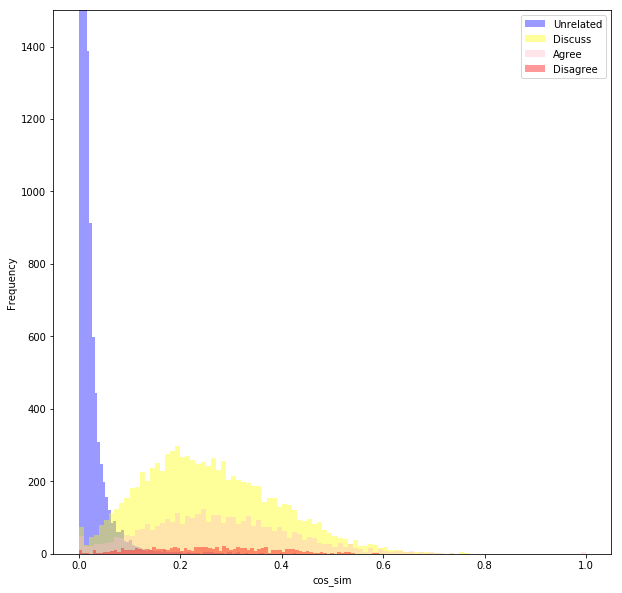

In [0]:
feature_name = 'cos_sim'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

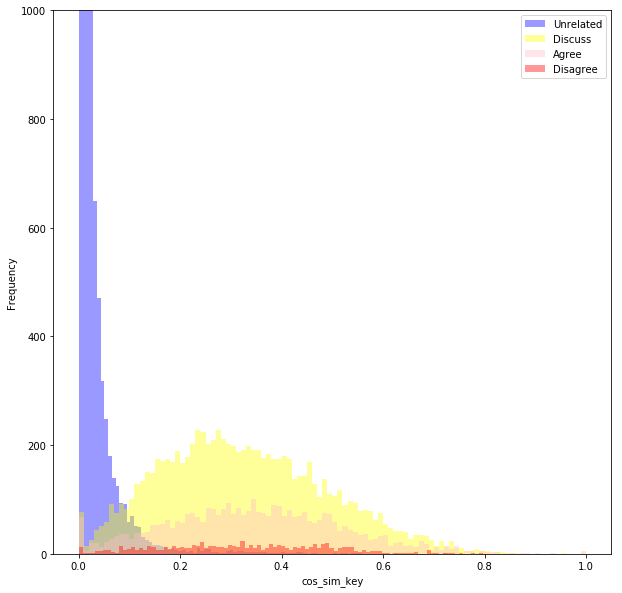

In [0]:
feature_name = 'cos_sim_key'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1000)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

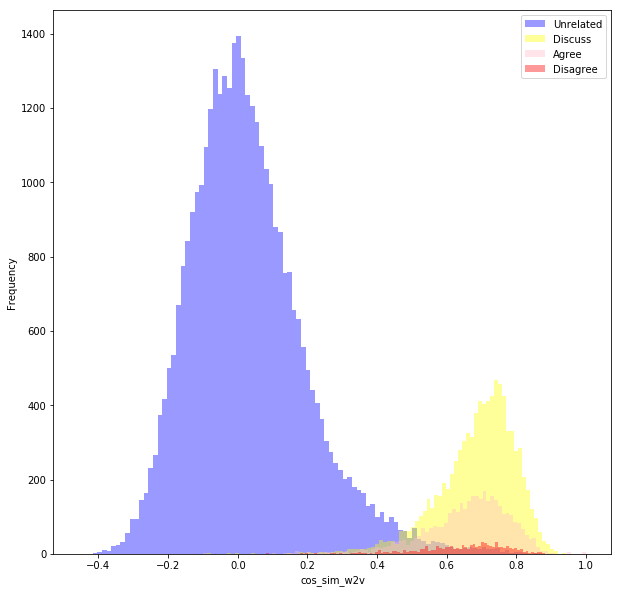

In [0]:
feature_name = 'cos_sim_w2v'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

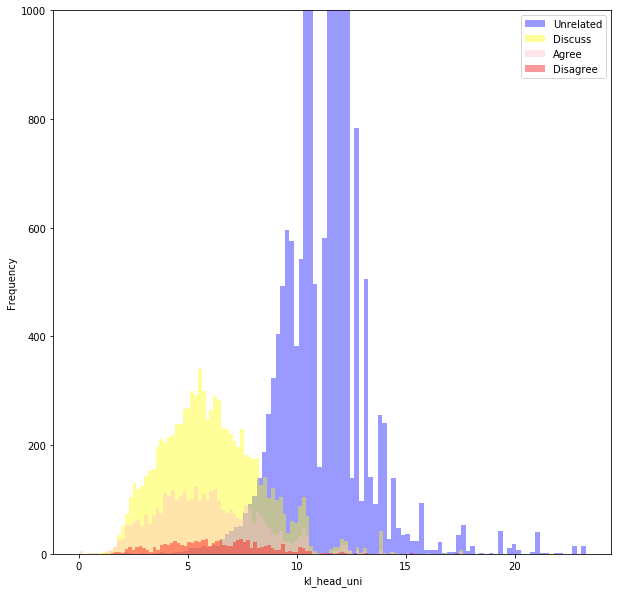

In [0]:
feature_name = 'kl_head_uni'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')
plt.ylim(0,1000)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

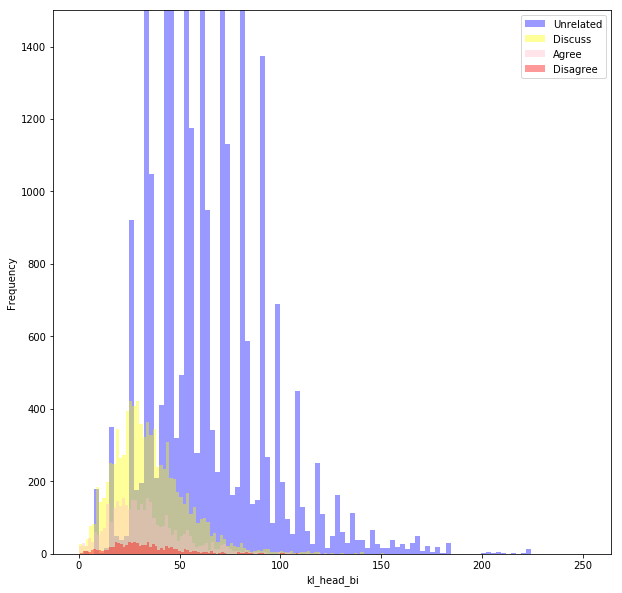

In [0]:
feature_name = 'kl_head_bi'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

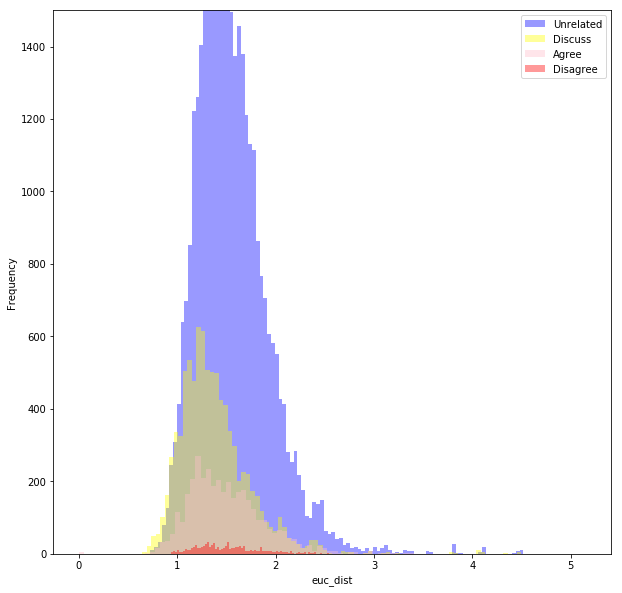

In [0]:
feature_name = 'euc_dist'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

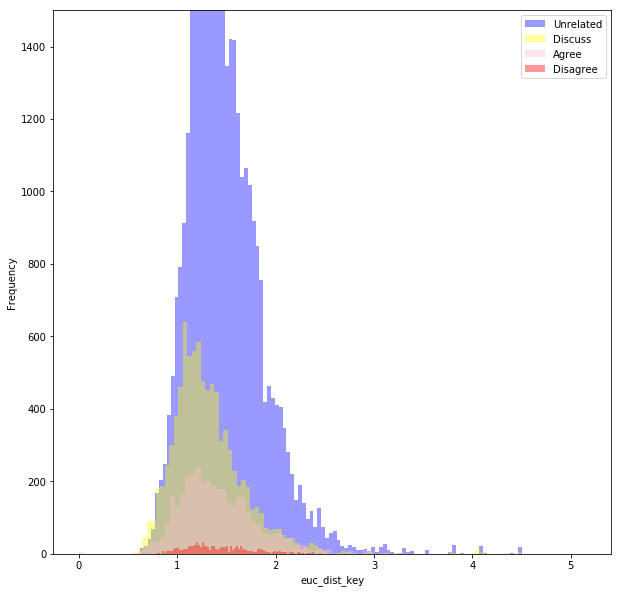

In [0]:
feature_name = 'euc_dist_key'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

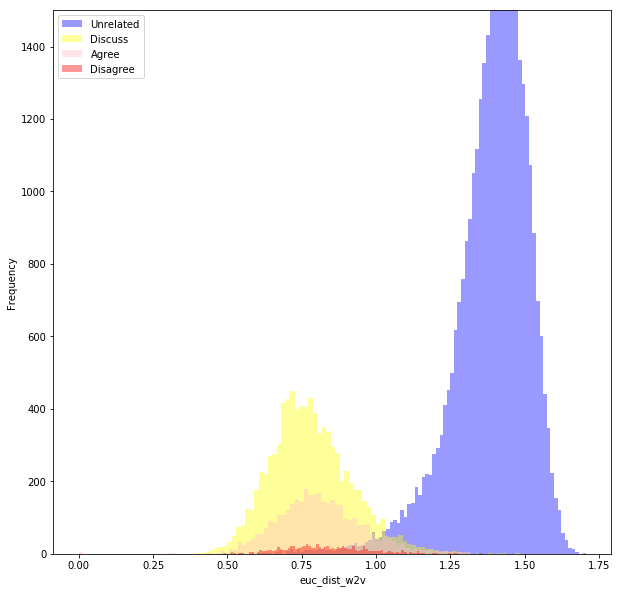

In [0]:
feature_name = 'euc_dist_w2v'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

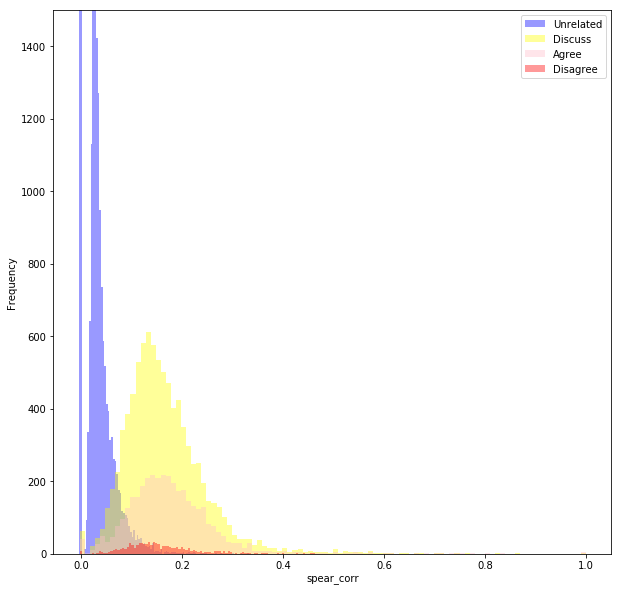

In [0]:
feature_name = 'spear_corr'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

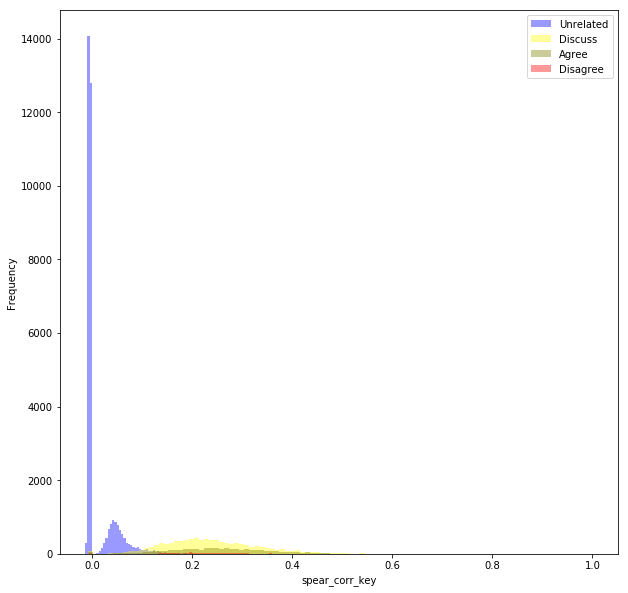

In [0]:
feature_name = 'spear_corr_key'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_merge_agree[feature_name], kde=False,  bins=100, color="olive", label='Agree')
sns.distplot(all_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

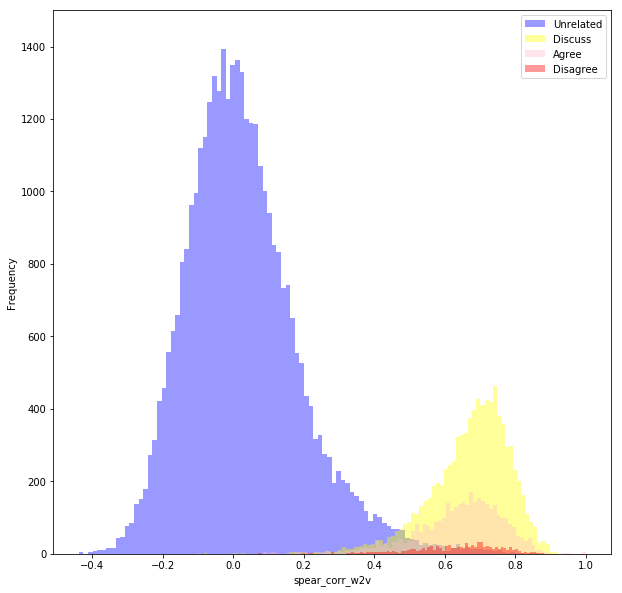

In [0]:
feature_name = 'spear_corr_w2v'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

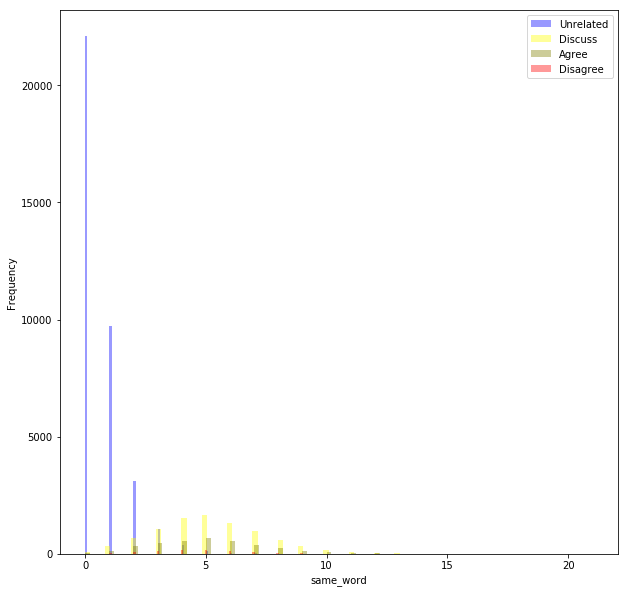

In [0]:
feature_name = 'same_word'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_merge_agree[feature_name], kde=False,  bins=100, color="olive", label='Agree')
sns.distplot(all_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

test set

In [0]:
all_test_merge[0:2]

,Headline,Body ID,Stance,articleBody,cos_sim,cos_sim_key,cos_sim_w2v,kl_head_uni,kl_head_bi,euc_dist,euc_dist_key,euc_dist_w2v,spear_corr,spear_corr_key,spear_corr_w2v,same_word
0,"[ferguson, riot, pregnant, woman, lose, eye, c...",2008,unrelated,"[respected, senior, french, police, officer, i...",0.008402,0.018119,0.019486,10.613435,102.068682,1.280021,0.887168,1.400367,0.023827,0.047571,0.005300,1.0
1,"[crazy, conservatives, sure, gitmo, detainee, ...",1550,unrelated,"[dave, morin, social, network, company, path, ...",0.000000,0.000000,-0.087034,11.869600,61.788162,1.617679,1.380690,1.474472,-0.001332,-0.003562,-0.105342,0.0


In [0]:
all_test_merge_copy = all_test_merge.copy()

In [0]:
all_test_merge.shape

(25413, 16)

In [0]:
(all_test_merge.dropna()).shape

(24535, 16)

In [0]:
#There are some out of vocabulary words are reset to 0
all_test_merge = all_test_merge.fillna(value=0)

In [0]:
all_test_merge.shape

(25413, 16)

In [0]:
(all_test_merge.dropna()).shape

(25413, 16)

In [0]:
# all_test_merge.to_csv('all_test_merge.csv')

In [0]:
# all_test_merge = pd.read_csv('all_test_merge.csv')

In [0]:
all_test_merge_unrelated = all_test_merge[all_test_merge['Stance'] == 'unrelated']
all_test_merge_agree = all_test_merge[all_test_merge['Stance'] == 'agree']
all_test_merge_disagree = all_test_merge[all_test_merge['Stance'] == 'disagree']
all_test_merge_discuss = all_test_merge[all_test_merge['Stance'] == 'discuss']

In [0]:
all_test_merge.describe()

,Body ID,cos_sim,cos_sim_key,cos_sim_w2v,kl_head_uni,kl_head_bi,euc_dist,euc_dist_key,euc_dist_w2v,spear_corr,spear_corr_key,spear_corr_w2v,same_word
count,25413.000000,25413.000000,25413.000000,25413.000000,25413.000000,25413.000000,25413.000000,25413.000000,25413.000000,25413.000000,25413.000000,25413.000000,25413.000000
mean,1407.471373,0.086492,0.085931,0.151785,10.011110,53.843079,1.518958,0.993637,1.282096,0.060320,0.065818,0.144868,1.778224
std,734.781119,0.153986,0.163356,0.248411,2.906798,26.459637,0.400606,0.346303,0.220920,0.090064,0.112752,0.243014,2.467019
min,1.000000,0.000000,0.000000,-0.380626,0.000000,-0.069253,0.000000,0.000000,0.000000,-0.004196,-0.014760,-0.388804,0.000000
25%,823.000000,0.000000,0.000000,-0.029644,8.548193,34.524956,1.248952,0.781783,1.180696,-0.001214,-0.003514,-0.031508,0.000000
50%,1449.000000,0.003650,0.000000,0.095094,11.247777,52.517115,1.476111,0.977870,1.344354,0.024834,-0.001703,0.090562,1.000000
75%,2049.000000,0.101192,0.088542,0.300749,12.023751,69.128214,1.721468,1.201824,1.435022,0.095383,0.110002,0.289069,3.000000
max,2586.000000,1.000000,1.000000,1.000000,22.608669,222.198159,4.211132,2.570658,1.661701,1.000000,1.000000,1.000000,18.000000


In [0]:
all_test_merge_unrelated.describe()

,Body ID,cos_sim,cos_sim_key,cos_sim_w2v,kl_head_uni,kl_head_bi,euc_dist,euc_dist_key,euc_dist_w2v,spear_corr,spear_corr_key,spear_corr_w2v,same_word
count,18349.000000,18349.000000,18349.000000,18349.000000,18349.000000,18349.000000,18349.000000,18349.000000,18349.000000,18349.000000,18349.000000,18349.000000,18349.000000
mean,1302.505804,0.008374,0.012448,0.042794,11.492997,61.125415,1.563762,1.023521,1.375923,0.016741,0.015198,0.038567,0.536705
std,738.253438,0.023172,0.040966,0.162750,1.250382,25.164607,0.405633,0.347066,0.135296,0.029752,0.044382,0.158998,0.885182
min,1.000000,0.000000,0.000000,-0.380626,2.060428,0.000000,0.271651,0.139767,0.000000,-0.004196,-0.014760,-0.388804,0.000000
25%,710.000000,0.000000,0.000000,-0.067178,10.633783,43.299354,1.289387,0.814449,1.317586,-0.001388,-0.003988,-0.069009,0.000000
50%,1326.000000,0.000000,0.000000,0.025980,11.736069,61.788162,1.516474,1.013102,1.395394,-0.000852,-0.002758,0.022675,0.000000
75%,1928.000000,0.006845,0.000000,0.131219,12.023751,71.094222,1.767939,1.231160,1.460943,0.031916,-0.000948,0.125373,1.000000
max,2527.000000,0.562486,0.797962,0.854976,22.608669,222.198159,4.211132,2.570658,1.661701,0.380965,0.707213,0.849380,10.000000


In [0]:
all_test_merge_agree.describe()

,Body ID,cos_sim,cos_sim_key,cos_sim_w2v,kl_head_uni,kl_head_bi,euc_dist,euc_dist_key,euc_dist_w2v,spear_corr,spear_corr_key,spear_corr_w2v,same_word
count,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000
mean,1684.186022,0.313454,0.302954,0.414171,5.962540,32.926027,1.443511,0.923500,1.065971,0.180036,0.203715,0.399485,5.207042
std,668.944643,0.164722,0.213214,0.177991,2.508317,17.636426,0.351942,0.337130,0.179519,0.092189,0.123275,0.176537,2.477706
min,1.000000,0.000000,0.000000,-0.091695,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001733,-0.006320,-0.129384,0.000000
25%,1232.000000,0.194767,0.132009,0.285612,4.245302,20.656423,1.201175,0.695649,0.970124,0.126277,0.124563,0.274018,4.000000
50%,1767.000000,0.308095,0.281913,0.416982,5.658005,30.952503,1.416789,0.903497,1.079082,0.170915,0.197820,0.397472,5.000000
75%,2289.000000,0.428032,0.445727,0.529024,7.211417,41.807287,1.639234,1.132098,1.194894,0.221537,0.272921,0.512450,7.000000
max,2586.000000,1.000000,1.000000,1.000000,17.643019,134.909104,3.787335,2.527678,1.477630,1.000000,1.000000,1.000000,18.000000


In [0]:
all_test_merge_disagree.describe()

,Body ID,cos_sim,cos_sim_key,cos_sim_w2v,kl_head_uni,kl_head_bi,euc_dist,euc_dist_key,euc_dist_w2v,spear_corr,spear_corr_key,spear_corr_w2v,same_word
count,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000
mean,1828.215208,0.255816,0.197299,0.292052,7.031484,36.333264,1.517110,0.932404,1.178574,0.144806,0.146739,0.279743,4.054519
std,644.377609,0.177417,0.191374,0.148829,2.547027,20.114618,0.371663,0.336238,0.145436,0.097713,0.122718,0.144291,2.044733
min,157.000000,0.000000,0.000000,-0.128326,1.588125,-0.066061,0.252743,0.117140,0.000000,-0.001500,-0.005159,-0.105403,0.000000
25%,1345.000000,0.107718,0.041765,0.192033,5.123749,23.096228,1.281076,0.759352,1.104261,0.081659,0.079556,0.188406,2.000000
50%,1945.000000,0.229517,0.142684,0.292235,6.853017,34.816780,1.472566,0.900840,1.189330,0.124303,0.134276,0.282658,4.000000
75%,2392.000000,0.371420,0.297018,0.388243,8.676032,45.602466,1.688382,1.152151,1.269842,0.176536,0.189635,0.373758,5.000000
max,2586.000000,0.862049,1.000000,0.906331,17.643019,150.267953,3.779440,2.343364,1.502216,0.632207,1.000000,0.879965,12.000000


In [0]:
all_test_merge_discuss.describe()

,Body ID,cos_sim,cos_sim_key,cos_sim_w2v,kl_head_uni,kl_head_bi,euc_dist,euc_dist_key,euc_dist_w2v,spear_corr,spear_corr_key,spear_corr_w2v,same_word
count,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000
mean,1655.268593,0.284404,0.278071,0.466030,6.111040,35.560352,1.367247,0.910264,1.004721,0.175218,0.202468,0.452210,5.064292
std,641.136547,0.160074,0.197007,0.213238,2.317780,20.013000,0.359614,0.329039,0.225541,0.095909,0.130847,0.210657,2.281380
min,3.000000,0.000000,0.000000,-0.137996,0.000000,-0.069253,0.000000,0.000000,0.000000,-0.002292,-0.006600,-0.135050,0.000000
25%,1199.750000,0.164590,0.114956,0.307652,4.439471,22.615320,1.131114,0.706438,0.832641,0.118113,0.120922,0.294858,4.000000
50%,1763.000000,0.275544,0.261318,0.452491,5.849794,31.543802,1.318902,0.890652,1.045097,0.160975,0.192694,0.432895,5.000000
75%,2194.000000,0.385038,0.424738,0.650801,7.488404,44.119631,1.559478,1.117356,1.175299,0.213577,0.272963,0.632900,6.000000
max,2583.000000,1.000000,1.000000,1.000000,17.643019,157.725662,3.930642,2.421600,1.508639,1.000000,1.000000,1.000000,17.000000


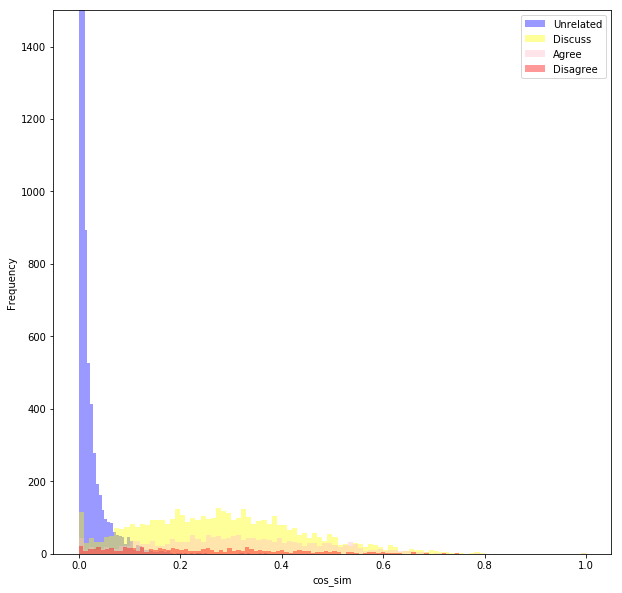

In [0]:
feature_name = 'cos_sim'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(np.nan_to_num(all_test_merge_unrelated[feature_name]), kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_test_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_test_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_test_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

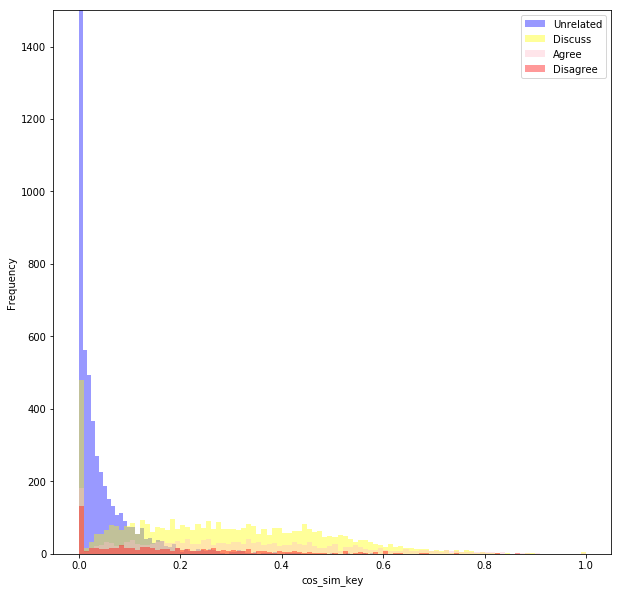

In [0]:
#bad feature
feature_name = 'cos_sim_key'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_test_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_test_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_test_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_test_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

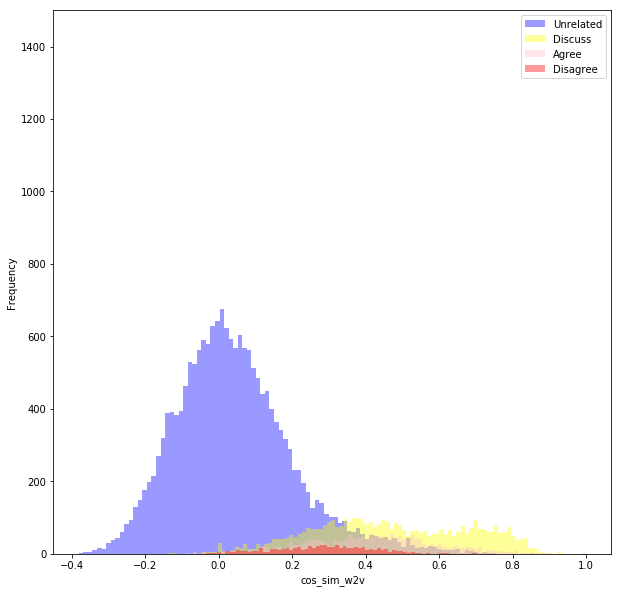

In [0]:
feature_name = 'cos_sim_w2v'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_test_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_test_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_test_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_test_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

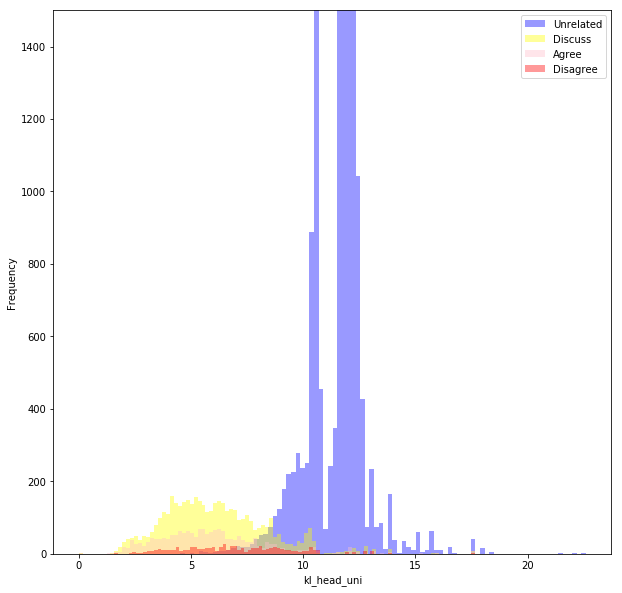

In [0]:
feature_name = 'kl_head_uni'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_test_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_test_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_test_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_test_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

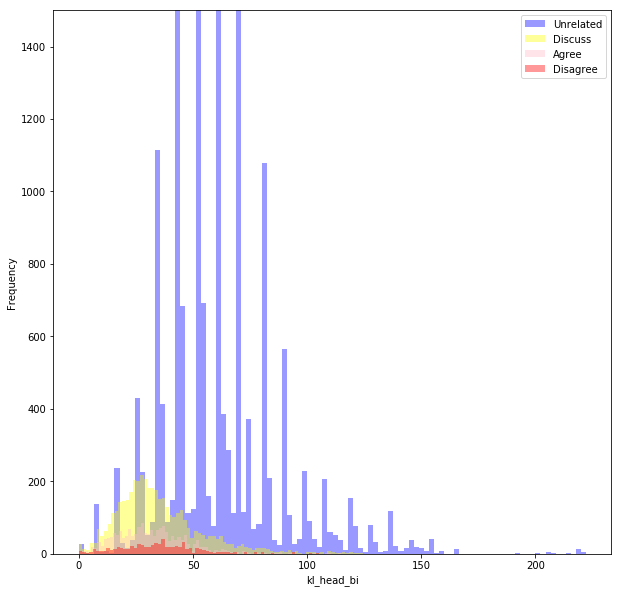

In [0]:
feature_name = 'kl_head_bi'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_test_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_test_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_test_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_test_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

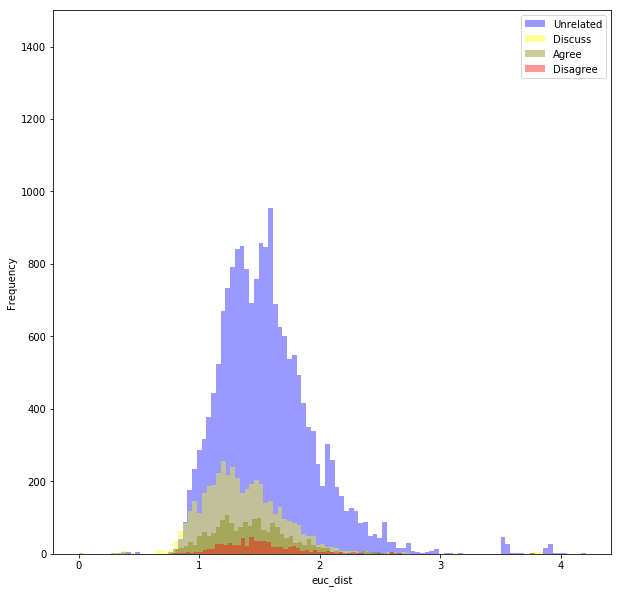

In [0]:
#bad feature
feature_name = 'euc_dist'
plt.figure(figsize = (10, 10))

sns.distplot(all_test_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_test_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_test_merge_agree[feature_name], kde=False,  bins=100, color="olive", label='Agree')
sns.distplot(all_test_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

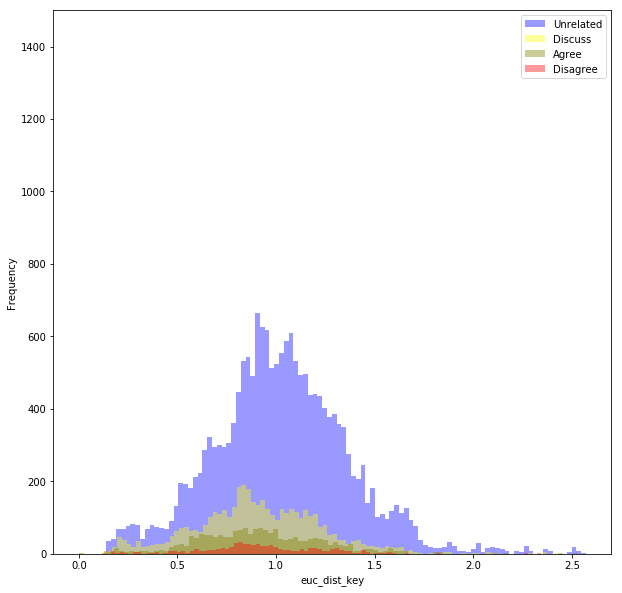

In [0]:
#bad feature
feature_name = 'euc_dist_key'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_test_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_test_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_test_merge_agree[feature_name], kde=False,  bins=100, color="olive", label='Agree')
sns.distplot(all_test_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

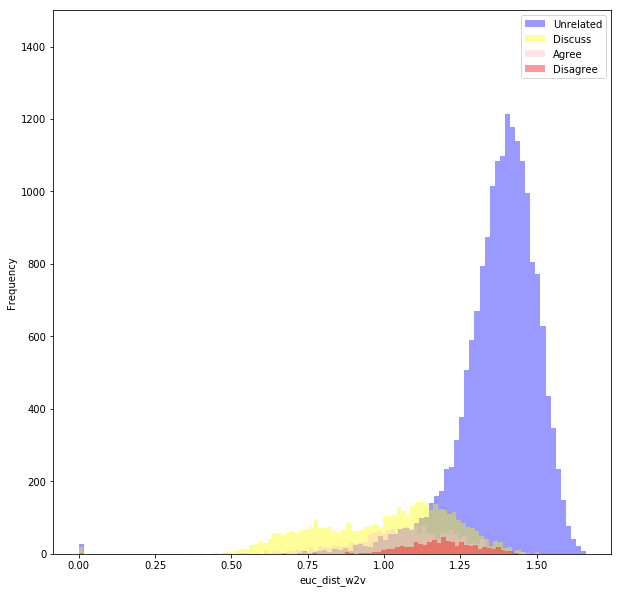

In [0]:
feature_name = 'euc_dist_w2v'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_test_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_test_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_test_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_test_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

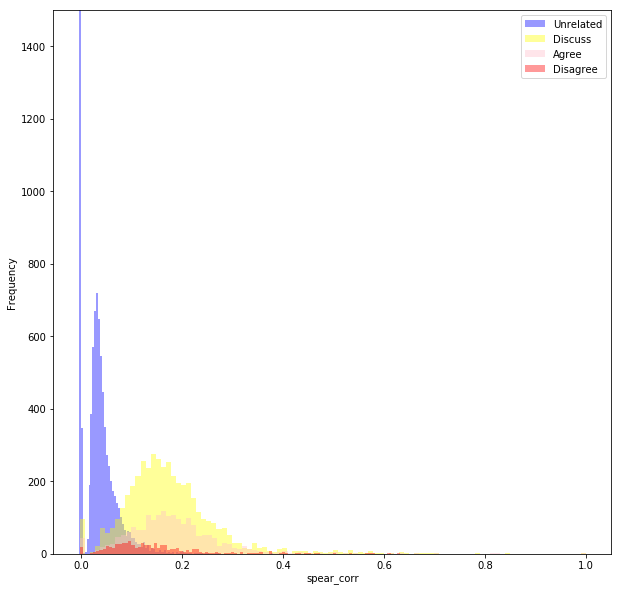

In [0]:
feature_name = 'spear_corr'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_test_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_test_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_test_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_test_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

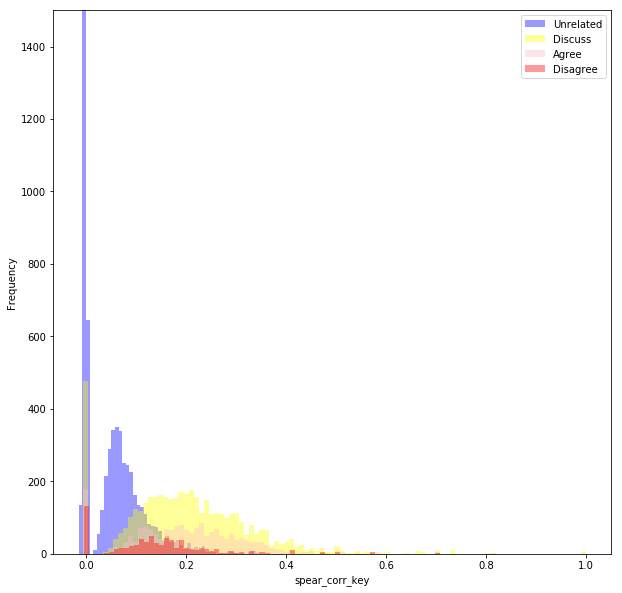

In [0]:
#bad feature
feature_name = 'spear_corr_key'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_test_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_test_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_test_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_test_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

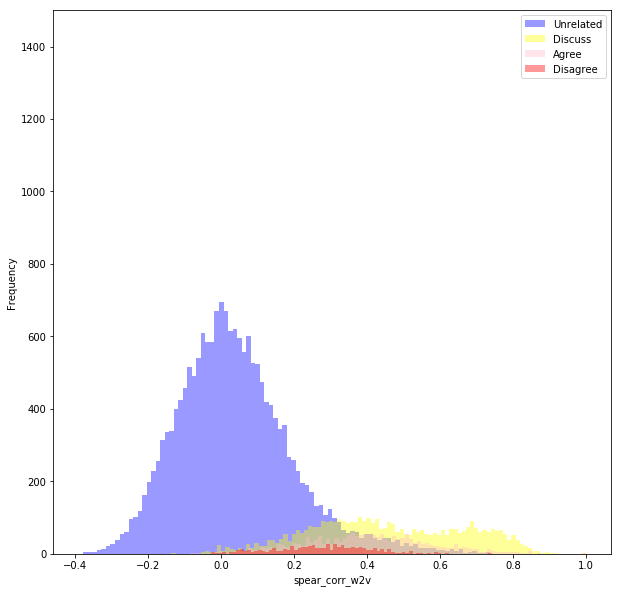

In [0]:
feature_name = 'spear_corr_w2v'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_test_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_test_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_test_merge_agree[feature_name], kde=False,  bins=100, color="pink", label='Agree')
sns.distplot(all_test_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

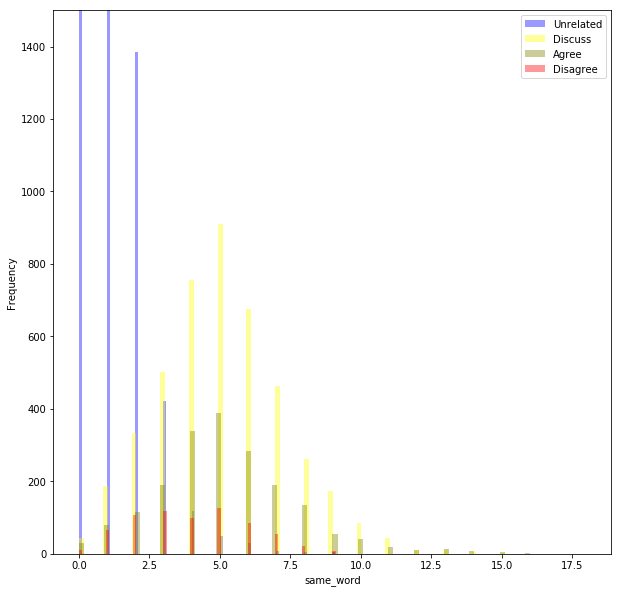

In [0]:
feature_name = 'same_word'
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 10))

sns.distplot(all_test_merge_unrelated[feature_name], kde=False,  bins=100, color="blue",  label = 'Unrelated')
sns.distplot(all_test_merge_discuss[feature_name], kde=False,  bins=100, color="yellow",  label = 'Discuss')
sns.distplot(all_test_merge_agree[feature_name], kde=False,  bins=100, color="olive", label='Agree')
sns.distplot(all_test_merge_disagree[feature_name], kde=False,  bins=100, color="red", label = 'Disagree')

plt.ylim(0,1500)
# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.legend()
plt.show()

Insert one vs all label

In [0]:
data = all_merge.copy()

In [0]:
data[0:2]

,Headline,Body ID,Stance,articleBody,cos_sim,cos_sim_key,cos_sim_w2v,kl_head_uni,kl_head_bi,euc_dist,euc_dist_key,euc_dist_w2v,spear_corr,spear_corr_key,spear_corr_w2v,same_word
0,"[police, find, mass, graf, least, body, near, ...",712,unrelated,"[danny, boyle, direct, untitled, film, seth, r...",0.000000,0.000000,-0.132897,12.274821,107.867233,1.110189,0.956684,1.505255,-0.001715,-0.005329,-0.148394,0.0
1,"[hundreds, palestinians, flee, flood, gaza, is...",158,agree,"[hundreds, palestinians, evacuate, home, sunda...",0.525937,0.658249,0.764779,3.443514,20.116824,1.508805,1.388314,0.685887,0.193569,0.368627,0.733944,7.0


In [0]:
data['lin_unrelated'] = -1
data['lin_agree'] = -1
data['lin_disagree'] = -1
data['lin_discuss'] = -1

In [0]:
data['lr_unrelated'] = 0
data['lr_agree'] = 0
data['lr_disagree'] = 0
data['lr_discuss'] = 0

In [0]:
data['lin_unrelated'][data['Stance'] == 'unrelated'] = 1
data['lin_agree'][data['Stance'] == 'agree'] = 1
data['lin_disagree'][data['Stance'] == 'disagree'] = 1
data['lin_discuss'][data['Stance'] == 'discuss'] = 1

data['lr_unrelated'][data['Stance'] == 'unrelated'] = 1
data['lr_agree'][data['Stance'] == 'agree'] = 1
data['lr_disagree'][data['Stance'] == 'disagree'] = 1
data['lr_discuss'][data['Stance'] == 'discuss'] = 1

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing import

In [0]:
# data.to_csv('data.csv')

In [0]:
# data = pd.read_csv('data.csv')

In [0]:
test_data = all_test_merge.copy()

In [0]:
test_data[0:2]

,Headline,Body ID,Stance,articleBody,cos_sim,cos_sim_key,cos_sim_w2v,kl_head_uni,kl_head_bi,euc_dist,euc_dist_key,euc_dist_w2v,spear_corr,spear_corr_key,spear_corr_w2v,same_word
0,"[ferguson, riot, pregnant, woman, lose, eye, c...",2008,unrelated,"[respected, senior, french, police, officer, i...",0.008402,0.018119,0.019486,10.613435,102.068682,1.280021,0.887168,1.400367,0.023827,0.047571,0.005300,1.0
1,"[crazy, conservatives, sure, gitmo, detainee, ...",1550,unrelated,"[dave, morin, social, network, company, path, ...",0.000000,0.000000,-0.087034,11.869600,61.788162,1.617679,1.380690,1.474472,-0.001332,-0.003562,-0.105342,0.0


In [0]:
test_data['lin_unrelated'] = -1
test_data['lin_agree'] = -1
test_data['lin_disagree'] = -1
test_data['lin_discuss'] = -1

In [0]:
test_data['lr_unrelated'] = 0
test_data['lr_agree'] = 0
test_data['lr_disagree'] = 0
test_data['lr_discuss'] = 0

In [0]:
test_data['lin_unrelated'][test_data['Stance'] == 'unrelated'] = 1
test_data['lin_agree'][test_data['Stance'] == 'agree'] = 1
test_data['lin_disagree'][test_data['Stance'] == 'disagree'] = 1
test_data['lin_discuss'][test_data['Stance'] == 'discuss'] = 1

test_data['lr_unrelated'][test_data['Stance'] == 'unrelated'] = 1
test_data['lr_agree'][test_data['Stance'] == 'agree'] = 1
test_data['lr_disagree'][test_data['Stance'] == 'disagree'] = 1
test_data['lr_discuss'][test_data['Stance'] == 'discuss'] = 1

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing import

In [0]:
# test_data.to_csv('test_data.csv')

In [0]:
# test_data = pd.read_csv('test_data.csv')

###  subtask 1. training set and validation subset split

In [0]:
#shuffle the data
data = data.sample(frac=1)

In [0]:
data[0:2]

,Headline,Body ID,Stance,articleBody,cos_sim,cos_sim_key,cos_sim_w2v,kl_head_uni,kl_head_bi,euc_dist,...,spear_corr_w2v,same_word,lin_unrelated,lin_agree,lin_disagree,lin_discuss,lr_unrelated,lr_agree,lr_disagree,lr_discuss
48160,"[jihadi, john, name, mohammed, emwazi, west, l...",1660,unrelated,"[years, ago, job, china, evaluate, spoken, eng...",0.144693,0.18644,0.220222,10.093431,44.632611,1.303171,...,0.235311,1.0,1,-1,-1,-1,1,0,0,0
31884,"[vladimir, putin, get, pooped, bird, first, wo...",1155,unrelated,"[man, head, slap, people, carlisle, sneeze, cu...",0.000000,0.00000,-0.072145,11.736069,71.094222,1.509020,...,-0.099656,0.0,1,-1,-1,-1,1,0,0,0


In [0]:
data.shape

(49972, 24)

In [0]:
#split the training set and validation set
cut = round(49972*0.9)
train = data[0:cut]
valid = data[cut:49972]

In [0]:
train.shape

(44975, 24)

In [0]:
valid.shape

(4997, 24)

ratios of the four classes

ratios of the four classes in the whole set

In [0]:
train_stances[train_stances['Stance'] == 'agree'].shape[0]/train_stances.shape[0]

0.07360121668134155

In [0]:
train_stances[train_stances['Stance'] == 'disagree'].shape[0]/train_stances.shape[0]

0.016809413271432

In [0]:
train_stances[train_stances['Stance'] == 'discuss'].shape[0]/train_stances.shape[0]

0.1782798367085568

In [0]:
train_stances[train_stances['Stance'] == 'unrelated'].shape[0]/train_stances.shape[0]

0.7313095333386697

ratios of the four classes in the training set

In [0]:
train[train['Stance'] == 'agree'].shape[0]/train.shape[0]

0.07321845469705392

In [0]:
train[train['Stance'] == 'disagree'].shape[0]/train.shape[0]

0.01698721511951084

In [0]:
train[train['Stance'] == 'discuss'].shape[0]/train.shape[0]

0.17881045025013897

In [0]:
train[train['Stance'] == 'unrelated'].shape[0]/train.shape[0]

0.7309838799332963

ratios of the four classes in the validation set

In [0]:
valid[valid['Stance'] == 'agree'].shape[0]/valid.shape[0]

0.07704622773664198

In [0]:
valid[valid['Stance'] == 'disagree'].shape[0]/valid.shape[0]

0.015209125475285171

In [0]:
valid[valid['Stance'] == 'discuss'].shape[0]/valid.shape[0]

0.17350410246147688

In [0]:
valid[valid['Stance'] == 'unrelated'].shape[0]/valid.shape[0]

0.7342405443265959

###  subtask 6-10. model implementation, evaluation and improvement (Linear, LR, XGBoost)

In [0]:
def downsampling(df, model_name, r = 0.1):
    df1 = df[df[model_name]>0]
    df0 = df[df[model_name] <= 0]
    dfs = df0.sample(frac=r)
    sample = pd.concat([df1, dfs],axis=0)
    return sample

In [0]:
def onevsall(y_pred):
    result = []
    _,m = y_pred.shape
    y_pred_class = (y_pred == np.max(y_pred, axis = 0))
    for i in range(m):
        label = ''
        if y_pred_class[0,i]:
            label = 'unrelated'
        elif y_pred_class[1,i]:
            label = 'agree'
        elif y_pred_class[2,i]:
            label = 'disagree'
        elif y_pred_class[3,i]:
            label = 'discuss'
        result.append(label)
        
    assert len(result) == m
    return result

In [0]:
def onevsall_new(y_pred,t=[0,0,0,0]):
    result = []
    _,m = y_pred.shape #(4,m)
    for i in range(m):
        is_unrelated = False
        is_agree = False
        is_disagree = False
        is_discuss = False
        if y_pred[0,i] > t[0]:
            is_unrelated = True
        if y_pred[1,i] > t[1]:
            is_agree = True
        if y_pred[2,i] > t[2]:
            is_disagree = True
        if y_pred[3,i] > t[3]:
            is_discuss = True
        
        if is_disagree:
            label = 'disagree'
        elif is_agree:
            label = 'agree'
        elif is_discuss:
            label = 'discuss'
        elif is_unrelated:
            label = 'unrelated'
        
        result.append(label)
        
    assert len(result) == m
    return result

In [0]:
train[0:2]

,Headline,Body ID,Stance,articleBody,cos_sim,cos_sim_key,cos_sim_w2v,kl_head_uni,kl_head_bi,euc_dist,...,spear_corr_w2v,same_word,lin_unrelated,lin_agree,lin_disagree,lin_discuss,lr_unrelated,lr_agree,lr_disagree,lr_discuss
48160,"[jihadi, john, name, mohammed, emwazi, west, l...",1660,unrelated,"[years, ago, job, china, evaluate, spoken, eng...",0.144693,0.18644,0.220222,10.093431,44.632611,1.303171,...,0.235311,1.0,1,-1,-1,-1,1,0,0,0
31884,"[vladimir, putin, get, pooped, bird, first, wo...",1155,unrelated,"[man, head, slap, people, carlisle, sneeze, cu...",0.000000,0.00000,-0.072145,11.736069,71.094222,1.509020,...,-0.099656,0.0,1,-1,-1,-1,1,0,0,0


prepare X

In [0]:
list(train.columns)

['Headline',
 'Body ID',
 'Stance',
 'articleBody',
 'cos_sim',
 'cos_sim_key',
 'cos_sim_w2v',
 'kl_head_uni',
 'kl_head_bi',
 'euc_dist',
 'euc_dist_key',
 'euc_dist_w2v',
 'spear_corr',
 'spear_corr_key',
 'spear_corr_w2v',
 'same_word',
 'lin_unrelated',
 'lin_agree',
 'lin_disagree',
 'lin_discuss',
 'lr_unrelated',
 'lr_agree',
 'lr_disagree',
 'lr_discuss']

In [0]:
col = list(train.columns)[4:16]

In [0]:
col

['cos_sim',
 'cos_sim_key',
 'cos_sim_w2v',
 'kl_head_uni',
 'kl_head_bi',
 'euc_dist',
 'euc_dist_key',
 'euc_dist_w2v',
 'spear_corr',
 'spear_corr_key',
 'spear_corr_w2v',
 'same_word']

In [0]:
# xcols = ['cos_sim_key','cos_sim_w2v','kl_head_uni','euc_dist_w2v','spear_corr_w2v']
xcols = col

In [0]:
train_X = train[xcols].as_matrix()
valid_X = valid[xcols].as_matrix()
test_X = test_data[xcols].as_matrix()

train_X = md.preprocess_X(train_X)
valid_X = md.preprocess_X(valid_X)
test_X = md.preprocess_X(test_X)

In [0]:
m,n = train_X.shape
learning_rate = 0.1
iters = 500
ini_theta = np.zeros([n,1])

linear models

In [0]:
theta_lin = []
cost_lin = []
model_names_lin = ['lin_unrelated','lin_agree','lin_disagree','lin_discuss']
#restore prediction on validation
y_pred_lin = np.zeros([4,len(valid_X)]) 

In [0]:
#build 4 models
#unrelated
i = 0
model_name = model_names_lin[i]
print(model_name)
X = train_X
y = train[model_name].values.reshape([len(X),1])
#training...
theta, cost = md.gradient_linear(X, y, ini_theta, learning_rate, iters)
# print(theta)
theta_lin.append(theta)
cost_lin.append(cost)
y_pred_lin[i] = (valid_X@theta).reshape(len(valid_X))
valid_y = valid[model_name].values.reshape([len(valid),1])

lin_unrelated


In [0]:
threshold = 0.2
y_pred_class = y_pred_lin[i] > threshold
valid_y_class = valid_y > 0
md.evaluate(valid_y_class, y_pred_class)

[[1301   27]
 [  87 3582]]
Accuracy: 0.9771863117870723
Recall: 0.9762878168438267
Precision: 0.9925187032418953
F1 score: 0.9843363561417973
AUC: 0.977978245771311


AUC: 0.9952670452866248


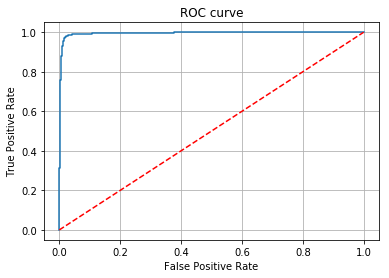

In [0]:
md.roc(valid_y, y_pred_lin[i])

In [0]:
#agree
i = 1
model_name = model_names_lin[i]
print(model_name)
#downsampling
# sample = downsampling(train, model_name, r = 1)
sample = downsampling(train, model_name, r = 0.3)
X = sample[xcols].as_matrix()
X = md.preprocess_X(X)
y = sample[model_name].values.reshape([len(X),1])
#training...
theta, cost = md.gradient_linear(X, y, ini_theta, learning_rate, iters)
# print(theta)
theta_lin.append(theta)
cost_lin.append(cost)
y_pred_lin[i] = (valid_X@theta).reshape(len(valid_X))
valid_y = valid[model_name].values.reshape([len(valid),1])

lin_agree


In [0]:
threshold = 0
y_pred_class = y_pred_lin[i] > threshold
valid_y_class = valid_y > 0
md.evaluate(valid_y_class, y_pred_class)

[[3945  667]
 [  92  293]]
Accuracy: 0.8481088653191915
Recall: 0.7610389610389611
Precision: 0.30520833333333336
F1 score: 0.4356877323420074
AUC: 0.8082081188542592


AUC: 0.8981995021457294


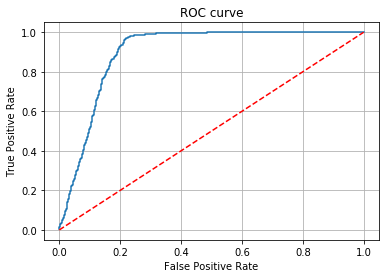

In [0]:
md.roc(valid_y, y_pred_lin[i])

In [0]:
#disagree
i = 2
model_name = model_names_lin[i]
print(model_name)
#downsampling
# sample = downsampling(train, model_name, r = 1)
sample = downsampling(train, model_name, r = 0.05)
X = sample[xcols].as_matrix()
X = md.preprocess_X(X)
y = sample[model_name].values.reshape([len(X),1])
#training...
theta, cost = md.gradient_linear(X, y, ini_theta, learning_rate, iters)
# print(theta)
theta_lin.append(theta)
cost_lin.append(cost)
y_pred_lin[i] = (valid_X@theta).reshape(len(valid_X))

lin_disagree


In [0]:
threshold = -0.3
y_pred_class = y_pred_lin[i] > threshold
valid_y_class = valid_y > 0
md.evaluate(valid_y_class, y_pred_class)

[[3618  994]
 [  15  370]]
Accuracy: 0.7980788473083851
Recall: 0.961038961038961
Precision: 0.27126099706744866
F1 score: 0.4230989136649514
AUC: 0.8727571214561675


AUC: 0.8970263907818115


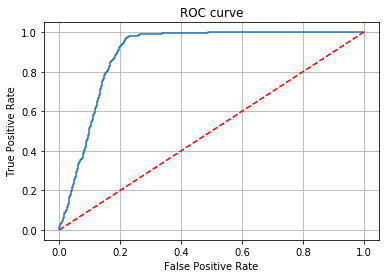

In [0]:
md.roc(valid_y, y_pred_lin[i])

In [0]:
#discuss
i = 3
model_name = model_names_lin[i]
print(model_name)
X = train_X
y = train[model_name].values.reshape([len(X),1])
#training...
theta, cost = md.gradient_linear(X, y, ini_theta, learning_rate, iters)
# print(theta)
theta_lin.append(theta)
cost_lin.append(cost)
y_pred_lin[i] = (valid_X@theta).reshape(len(valid_X))

lin_discuss


In [0]:
threshold = -0.1
y_pred_class = y_pred_lin[i] > threshold
valid_y_class = valid_y > 0
md.evaluate(valid_y_class, y_pred_class)

[[3750  862]
 [  49  336]]
Accuracy: 0.8176906143686212
Recall: 0.8727272727272727
Precision: 0.28046744574290483
F1 score: 0.42451042324699934
AUC: 0.8429117716628557


AUC: 0.8882058098016468


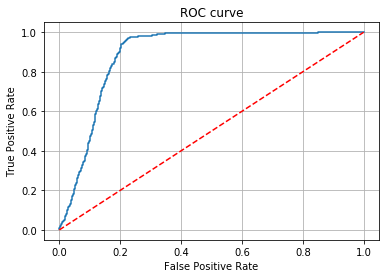

In [0]:
md.roc(valid_y, y_pred_lin[i])

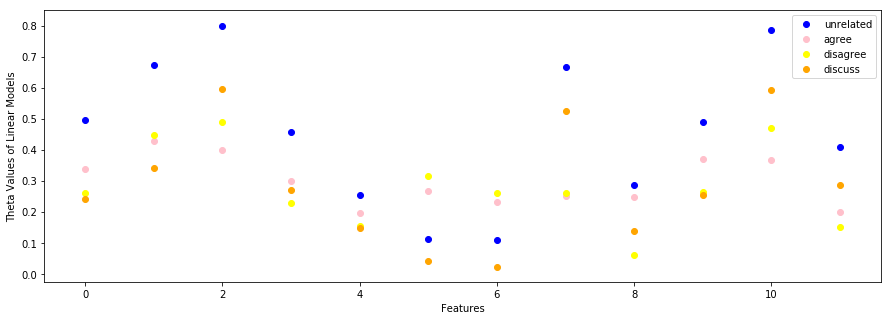

In [0]:
plt.figure(figsize = (15, 5))
plt.scatter(range(len(theta_lin[0])-1),np.abs(theta_lin[0][1:]), color = 'blue', label = 'unrelated')
plt.scatter(range(len(theta_lin[1])-1),np.abs(theta_lin[1][1:]), color = 'pink', label = 'agree')
plt.scatter(range(len(theta_lin[1])-1),np.abs(theta_lin[2][1:]), color = 'yellow', label = 'disagree')
plt.scatter(range(len(theta_lin[1])-1),np.abs(theta_lin[3][1:]), color = 'orange', label = 'discuss')
plt.xlabel('Features')
plt.ylabel('Theta Values of Linear Models')
plt.legend()
plt.show()

In [0]:
t = [0.2, 0, -0.3, -0.1]

In [0]:
valid_pred_lin = onevsall(y_pred_lin)

In [0]:
sum(valid_pred_lin == valid['Stance'])/ 4997

0.8515109065439264

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
y_true = valid['Stance']
y_pred = valid_pred_lin
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

      agree       0.60      0.01      0.02       385
   disagree       0.07      0.39      0.12        76
    discuss       0.69      0.68      0.68       867
  unrelated       0.98      0.99      0.98      3669

avg / total       0.89      0.85      0.84      4997



In [0]:
valid_pred_lin = onevsall_new(y_pred_lin,t)

In [0]:
sum(valid_pred_lin == valid['Stance'])/ 4997

0.8841304782869722

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
y_true = valid['Stance']
y_pred = valid_pred_lin
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

      agree       0.67      0.01      0.01       385
   disagree       0.00      0.00      0.00        76
    discuss       0.64      0.90      0.75       867
  unrelated       0.97      0.99      0.98      3669

avg / total       0.87      0.88      0.85      4997



/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
confusion_matrix(y_true, y_pred, sample_weight=None)

array([[   2,    0,  343,   40],
       [   0,    0,   70,    6],
       [   1,    0,  784,   82],
       [   0,    0,   37, 3632]])

result on test set

In [0]:
#restore test results
ts_pred_lin = np.zeros([4,len(test_X)]) 

In [0]:
for i in range(4):
    theta = theta_lin[i]
    ts_pred_lin[i] = (test_X@theta).reshape(len(test_X))

In [0]:
test_pred_lin = onevsall(ts_pred_lin)

In [0]:
sum(test_pred_lin == test_data['Stance'])/ len(test_data)

0.7892810766143312

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
y_true = test_data['Stance']
y_pred = test_pred_lin
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

      agree       0.31      0.03      0.06      1903
   disagree       0.09      0.31      0.14       697
    discuss       0.71      0.38      0.50      4464
  unrelated       0.89      0.99      0.93     18349

avg / total       0.79      0.79      0.77     25413



In [0]:
test_pred_lin = onevsall_new(ts_pred_lin,t)

In [0]:
sum(test_pred_lin == test_data['Stance'])/ len(test_data)

0.8236729233069688

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
y_true = test_data['Stance']
y_pred = test_pred_lin
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

      agree       0.45      0.00      0.01      1903
   disagree       0.00      0.00      0.00       697
    discuss       0.62      0.63      0.63      4464
  unrelated       0.87      0.99      0.92     18349

avg / total       0.77      0.82      0.78     25413



/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
confusion_matrix(y_true, y_pred, sample_weight=None)

array([[    5,     0,  1192,   706],
       [    0,     0,   262,   435],
       [    6,     0,  2833,  1625],
       [    0,     0,   255, 18094]])

In [0]:
col[6]

'euc_dist_key'

LR models

In [0]:
theta_lr = []
cost_lr = []
lam = 0.1
model_names_lr = ['lr_unrelated','lr_agree','lr_disagree','lr_discuss']
#restore prediction on validation
y_pred_lr = np.zeros([4,len(valid_X)]) 

In [0]:
#build 4 models
#unrelated
i = 0
model_name = model_names_lr[i]
print(model_name)
X = train_X
y = train[model_name].values.reshape([len(X),1])
#training...
theta, cost = md.gradient_lr(X, y, ini_theta, learning_rate, iters, lam)
theta_lr.append(theta)
cost_lr.append(cost)
y_pred_lr[i] = (md.sigmoid(valid_X@theta)).reshape(len(valid_X))
valid_y = valid[model_name].values.reshape([len(valid),1])

lr_unrelated


In [0]:
threshold = 0.7
y_pred_class = y_pred_lr[i] > threshold
valid_y_class = valid_y > 0.5
md.evaluate(valid_y_class, y_pred_class)

[[1303   25]
 [ 103 3566]]
Accuracy: 0.974384630778467
Recall: 0.9719269555737258
Precision: 0.9930381509328877
F1 score: 0.9823691460055096
AUC: 0.9765508271844533


AUC: 0.9944149040971736


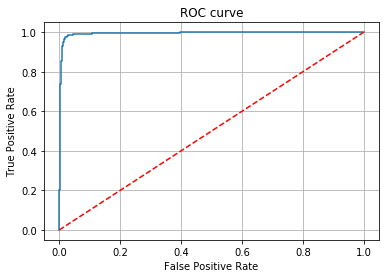

In [0]:
md.roc(valid_y, y_pred_lr[i])

In [0]:
#agree
i = 1
model_name = model_names_lr[i]
print(model_name)
#downsampling
# sample = downsampling(train, model_name, r = 1)
sample = downsampling(train, model_name, r = 0.3)
X = sample[xcols].as_matrix()
X = md.preprocess_X(X)
y = sample[model_name].values.reshape([len(X),1])
#training...
theta, cost = md.gradient_lr(X, y, ini_theta, learning_rate, iters, lam)
theta_lr.append(theta)
cost_lr.append(cost)
y_pred_lr[i] = (md.sigmoid(valid_X@theta)).reshape(len(valid_X))
valid_y = valid[model_name].values.reshape([len(valid),1])

lr_agree


In [0]:
threshold = 0.3
y_pred_class = y_pred_lr[i] > threshold
valid_y_class = valid_y > 0.5
md.evaluate(valid_y_class, y_pred_class)

[[3684  928]
 [  30  355]]
Accuracy: 0.8082849709825896
Recall: 0.922077922077922
Precision: 0.2766952455183164
F1 score: 0.42565947242206226
AUC: 0.8604318491569142


AUC: 0.8919081785517171


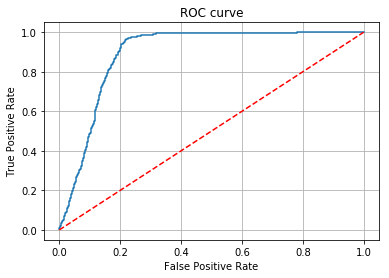

In [0]:
md.roc(valid_y, y_pred_lr[i])

In [0]:
#disagree
i = 2
model_name = model_names_lr[i]
print(model_name)
#downsampling
# sample = downsampling(train, model_name, r = 1)
sample = downsampling(train, model_name, r = 0.1)
X = sample[xcols].as_matrix()
X = md.preprocess_X(X)
y = sample[model_name].values.reshape([len(X),1])
#training...
theta, cost = md.gradient_lr(X, y, ini_theta, learning_rate, iters, lam)
theta_lr.append(theta)
cost_lr.append(cost)
y_pred_lr[i] = (md.sigmoid(valid_X@theta)).reshape(len(valid_X))
valid_y = valid[model_name].values.reshape([len(valid),1])

lr_disagree


In [0]:
threshold = 0.2
y_pred_class = y_pred_lr[i] > threshold
valid_y_class = valid_y > 0.5
md.evaluate(valid_y_class, y_pred_class)

[[3699 1222]
 [   3   73]]
Accuracy: 0.7548529117470483
Recall: 0.9605263157894737
Precision: 0.05637065637065637
F1 score: 0.10649161196207148
AUC: 0.8561014021540337


AUC: 0.8569770799687697


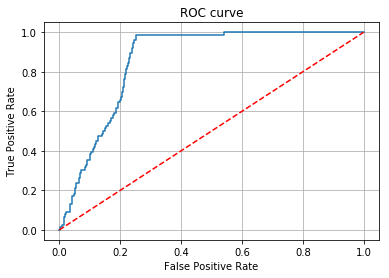

In [0]:
md.roc(valid_y, y_pred_lr[i])

In [0]:
#discuss
i = 3
model_name = model_names_lr[i]
print(model_name)
X = train_X
y = train[model_name].values.reshape([len(X),1])
#training...
theta, cost = md.gradient_lr(X, y, ini_theta, learning_rate, iters, lam)
theta_lr.append(theta)
cost_lr.append(cost)
y_pred_lr[i] = (md.sigmoid(valid_X@theta)).reshape(len(valid_X))
valid_y = valid[model_name].values.reshape([len(valid),1])

lr_discuss


In [0]:
threshold = 0.2
y_pred_class = y_pred_lr[i] > threshold
valid_y_class = valid_y > 0.5
md.evaluate(valid_y_class, y_pred_class)

[[3608  522]
 [  16  851]]
Accuracy: 0.8923354012407444
Recall: 0.9815455594002307
Precision: 0.619810633648944
F1 score: 0.7598214285714285
AUC: 0.9275766537921252


AUC: 0.9423653409519341


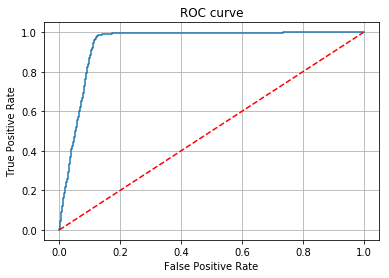

In [0]:
md.roc(valid_y, y_pred_lr[i])

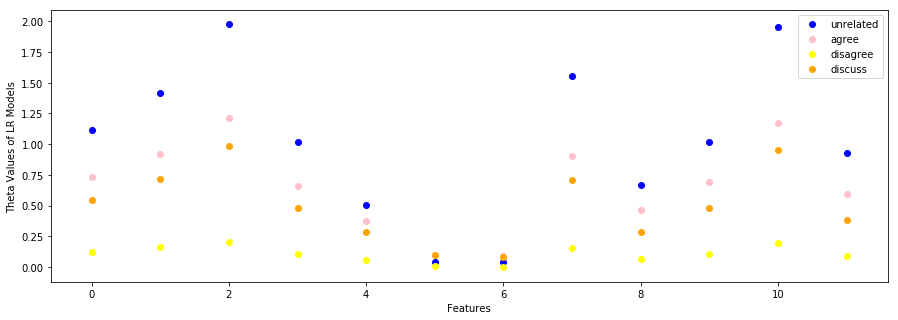

In [0]:
plt.figure(figsize = (15, 5))
plt.scatter(range(len(theta_lin[0])-1),np.abs(theta_lr[0][1:]), color = 'blue', label = 'unrelated')
plt.scatter(range(len(theta_lin[1])-1),np.abs(theta_lr[1][1:]), color = 'pink', label = 'agree')
plt.scatter(range(len(theta_lin[1])-1),np.abs(theta_lr[2][1:]), color = 'yellow', label = 'disagree')
plt.scatter(range(len(theta_lin[1])-1),np.abs(theta_lr[3][1:]), color = 'orange', label = 'discuss')
plt.xlabel('Features')
plt.ylabel('Theta Values of LR Models')
plt.legend()
plt.show()

In [0]:
t = [0.7,0.3,0.2,0.2]

In [0]:
valid_pred_lr = onevsall(y_pred_lr)

In [0]:
sum(valid_pred_lr == valid['Stance'])/ 4997

0.8817290374224535

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
y_true = valid['Stance']
y_pred = valid_pred_lr
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

      agree       0.00      0.00      0.00       385
   disagree       0.00      0.00      0.00        76
    discuss       0.65      0.88      0.74       867
  unrelated       0.95      0.99      0.97      3669

avg / total       0.81      0.88      0.84      4997



/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
valid_pred_lr = onevsall_new(y_pred_lr,t)

In [0]:
sum(valid_pred_lr == valid['Stance'])/ 4997

0.8789273564138483

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
y_true = valid['Stance']
y_pred = valid_pred_lr
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

      agree       0.27      0.08      0.12       385
   disagree       0.00      0.00      0.00        76
    discuss       0.61      0.89      0.73       867
  unrelated       0.99      0.98      0.98      3669

avg / total       0.85      0.88      0.86      4997



/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
confusion_matrix(y_true, y_pred, sample_weight=None)

array([[  31,    0,  338,   16],
       [   7,    0,   68,    1],
       [  76,    0,  775,   16],
       [   1,    0,   82, 3586]])

result on test set

In [0]:
#restore test results
ts_pred_lr = np.zeros([4,len(test_X)]) 

In [0]:
for i in range(4):
    theta = theta_lr[i]
    ts_pred_lr[i] = (md.sigmoid(test_X@theta)).reshape(len(test_X))

In [0]:
test_pred_lr = onevsall(ts_pred_lr)

In [0]:
sum(test_pred_lr == test_data['Stance'])/ len(test_data)

0.7593357730295518

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
y_true = test_data['Stance']
y_pred = test_pred_lr
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

      agree       0.27      0.57      0.36      1903
   disagree       0.00      0.00      0.00       697
    discuss       0.00      0.00      0.00      4464
  unrelated       0.85      0.99      0.92     18349

avg / total       0.64      0.76      0.69     25413



/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
test_pred_lr = onevsall_new(ts_pred_lr,t)

In [0]:
sum(test_pred_lr == test_data['Stance'])/ len(test_data)

0.7638216660764175

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
y_true = test_data['Stance']
y_pred = test_pred_lr
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

      agree       0.26      0.77      0.39      1903
   disagree       0.00      0.00      0.00       697
    discuss       0.32      0.01      0.01      4464
  unrelated       0.91      0.98      0.94     18349

avg / total       0.73      0.76      0.71     25413



/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
confusion_matrix(y_true, y_pred, sample_weight=None)

array([[   33,     0,  1598,   272],
       [    5,     0,   470,   222],
       [  119,     0,  3720,   625],
       [    4,     0,   720, 17625]])

Xgboost model

In [0]:
import xgboost as xgb  

In [0]:
sample0 = (train[train['Stance'] == 'unrelated'].copy()).sample(frac = 0.2)
sample1 = train[train['Stance'] != 'unrelated'].copy()

In [0]:
sample = pd.concat([sample0, sample1],axis=0)

In [0]:
sample.shape

(18674, 24)

In [0]:
col = list(sample.columns)[4:16]

In [0]:
col

['cos_sim',
 'cos_sim_key',
 'cos_sim_w2v',
 'kl_head_uni',
 'kl_head_bi',
 'euc_dist',
 'euc_dist_key',
 'euc_dist_w2v',
 'spear_corr',
 'spear_corr_key',
 'spear_corr_w2v',
 'same_word']

In [0]:
tr_X = sample[col].values.copy()
vl_X = valid[col].values.copy()
ts_X = test_data[col].values.copy()

In [0]:
tr_Y = sample['Stance'].values.copy()
vl_Y = valid['Stance'].values.copy()
ts_Y = test_data['Stance'].values.copy()

In [0]:
for i in range(len(tr_Y)):
    if tr_Y[i] == 'unrelated':
        tr_Y[i] = 0
    elif tr_Y[i] == 'agree':
        tr_Y[i] = 1
    elif tr_Y[i] == 'disagree':
        tr_Y[i] = 2
    elif tr_Y[i] == 'discuss':
        tr_Y[i] = 3

In [0]:
for i in range(len(vl_Y)):
    if vl_Y[i] == 'unrelated':
        vl_Y[i] = 0
    elif vl_Y[i] == 'agree':
        vl_Y[i] = 1
    elif vl_Y[i] == 'disagree':
        vl_Y[i] = 2
    elif vl_Y[i] == 'discuss':
        vl_Y[i] = 3

In [0]:
params={
'booster':'gbtree',
'objective': 'multi:softmax', 
'num_class':4, 
'gamma':0.05, 
'max_depth':15, 
# 'lambda':50, 
'subsample':0.3, 
'colsample_bytree':0.7, 
'silent':1 ,
'eta': 0.2, 
'seed':710,
'nthread':4,
}

plst = list(params.items())

num_rounds = 100 
xg_train = xgb.DMatrix(tr_X, label=tr_Y)
xg_val = xgb.DMatrix(vl_X, label=vl_Y)
xg_test = xgb.DMatrix(ts_X)
watchlist = [(xg_train, 'train'),(xg_val, 'val')]

# training...
model = xgb.train(plst, xg_train, num_rounds, watchlist,early_stopping_rounds=100)
preds = model.predict(xg_test,ntree_limit=model.best_iteration)

[0]	train-merror:0.209007	val-merror:0.125876
Multiple eval metrics have been passed: 'val-merror' will be used for early stopping.

Will train until val-merror hasn't improved in 100 rounds.
[1]	train-merror:0.181804	val-merror:0.109466
[2]	train-merror:0.167506	val-merror:0.109065
[3]	train-merror:0.162311	val-merror:0.108665
[4]	train-merror:0.153957	val-merror:0.107264
[5]	train-merror:0.148656	val-merror:0.107464
[6]	train-merror:0.145229	val-merror:0.106064
[7]	train-merror:0.141909	val-merror:0.107665
[8]	train-merror:0.13891	val-merror:0.103462
[9]	train-merror:0.134144	val-merror:0.105063
[10]	train-merror:0.130288	val-merror:0.105463
[11]	train-merror:0.127718	val-merror:0.104062
[12]	train-merror:0.122952	val-merror:0.102461
[13]	train-merror:0.11931	val-merror:0.102261
[14]	train-merror:0.115722	val-merror:0.104863
[15]	train-merror:0.112563	val-merror:0.102461
[16]	train-merror:0.109832	val-merror:0.102061
[17]	train-merror:0.107958	val-merror:0.100861
[18]	train-merror:0.

In [0]:
set(preds)

{0.0, 1.0, 2.0, 3.0}

In [0]:
pred_class = []
for i in range(len(preds)):
    if preds[i] == 0:
        pred_class.append('unrelated')
    elif preds[i] == 1:
        pred_class.append('agree')
    elif preds[i] == 2:
        pred_class.append('disagree')
    elif preds[i] == 3:
        pred_class.append('discuss')
assert len(pred_class) == len(preds)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
y_true = ts_Y
y_pred = pred_class
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

      agree       0.32      0.37      0.34      1903
   disagree       0.09      0.03      0.04       697
    discuss       0.58      0.54      0.56      4464
  unrelated       0.94      0.96      0.95     18349

avg / total       0.81      0.82      0.81     25413



In [0]:
confusion_matrix(y_true, y_pred, sample_weight=None)

array([[  712,    80,   864,   247],
       [  166,    20,   267,   244],
       [ 1283,   112,  2415,   654],
       [   99,     6,   595, 17649]])

In [0]:
sum(y_pred == y_true)/len(y_true)

0.818321331601936

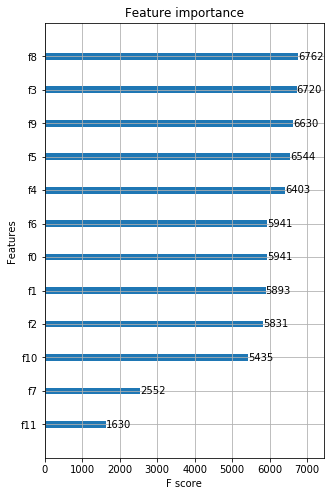

In [0]:
fig, ax = plt.subplots(figsize=(5, 8))
xgb.plot_importance(model, ax=ax, max_num_features=20)
plt.show()

In [0]:
col[8]

'spear_corr'

In [0]:
col[3]

'kl_head_uni'

In [0]:
col[9]

'spear_corr_key'

In [0]:
col[5]

'euc_dist'

In [0]:
col[2]

'cos_sim_w2v'

In [0]:
col[4]

'kl_head_bi'

In [0]:
col[7]

'euc_dist_w2v'

In [0]:
col[11]

'same_word'